**Importamos las paqueterias necesarias para el analisis.**


In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import matplotlib.dates as mdates
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importamos las bases de datos por año y con la dependencia**


In [3]:
datos = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/Lluvia/SalesTotalbyMonth_withTemperature_Rain.csv')
# datos = pd.read_csv('/content/drive/MyDrive/DATATHON_DSC/DATA_FULL/DATA_FULL.csv')
datos

Unnamed: 0 KeyFecha          Filial    Litros      Venta Estado  \
0              0  2017-01           ALAMO  136123.0  1120651.0    VEZ   
1              1  2017-01          ALDAMA   51862.0   440557.0    CHI   
2              2  2017-01         ALLENDE   94917.0   776635.0     NL   
3              3  2017-01     CALPULALPAN   67137.0   522378.0    TLX   
4              4  2017-01    CD. VICTORIA   87200.0   715542.0    TMS   
...          ...      ...             ...       ...        ...    ...   
1337        1337  2021-12     SAN NICOLAS  448734.0  5671409.0     NL   
1338        1338  2021-12  SANTA CATARINA  108538.0  1374997.0     NL   
1339        1339  2021-12  SOTO LA MARINA   25809.0   324083.0    TMS   
1340        1340  2021-12         TAMPICO  212424.0  2726534.0    TMS   
1341        1341  2021-12         VARAGAS  122506.0  1486852.0    COA   

      KeyEstado   KeyAM  Temperatura  Lluvia  
0            29  201701         20.7    36.9  
1             7  201701         11.7    12.3  
2            18  201701         16.8    10.2  
3            28  201701         12.5     0.4  
4            27  201701         20.3     8.3  
...         ...     ...          ...     ...  
1337         18  202112         19.0    12.0  
1338         18  202112         19.0    12.0  
1339         27  202112         22.2    12.6  
1340         27  202112         22.2    12.6  
1341          4  202112         18.8     5.0  

[1342 rows x 10 columns]

In [4]:
datos.columns

Index(['Unnamed: 0', 'KeyFecha', 'Filial', 'Litros', 'Venta', 'Estado',
       'KeyEstado', 'KeyAM', 'Temperatura', 'Lluvia'],
      dtype='object')

In [5]:
datos

Unnamed: 0 KeyFecha          Filial    Litros      Venta Estado  \
0              0  2017-01           ALAMO  136123.0  1120651.0    VEZ   
1              1  2017-01          ALDAMA   51862.0   440557.0    CHI   
2              2  2017-01         ALLENDE   94917.0   776635.0     NL   
3              3  2017-01     CALPULALPAN   67137.0   522378.0    TLX   
4              4  2017-01    CD. VICTORIA   87200.0   715542.0    TMS   
...          ...      ...             ...       ...        ...    ...   
1337        1337  2021-12     SAN NICOLAS  448734.0  5671409.0     NL   
1338        1338  2021-12  SANTA CATARINA  108538.0  1374997.0     NL   
1339        1339  2021-12  SOTO LA MARINA   25809.0   324083.0    TMS   
1340        1340  2021-12         TAMPICO  212424.0  2726534.0    TMS   
1341        1341  2021-12         VARAGAS  122506.0  1486852.0    COA   

      KeyEstado   KeyAM  Temperatura  Lluvia  
0            29  201701         20.7    36.9  
1             7  201701         11.7    12.3  
2            18  201701         16.8    10.2  
3            28  201701         12.5     0.4  
4            27  201701         20.3     8.3  
...         ...     ...          ...     ...  
1337         18  202112         19.0    12.0  
1338         18  202112         19.0    12.0  
1339         27  202112         22.2    12.6  
1340         27  202112         22.2    12.6  
1341          4  202112         18.8     5.0  

[1342 rows x 10 columns]

**Acomodamos los datos de fecha en el formato correcto**

In [6]:
datos['KeyFecha'] = datos['KeyFecha'].map(lambda x: datetime.datetime.strptime(x, "%Y-%m"))

In [7]:
datos.value_counts(["Filial"]).to_frame()

0
Filial             
ALAMO            60
ALDAMA           60
TAMPICO          60
SOTO LA MARINA   60
SANTA CATARINA   60
SAN NICOLAS      60
SAN LUIS POTOSI  60
SAN FERNANDO     60
SALTILLO         60
SALINASVICTORIA  60
RIO VERDE        60
REYNOSA          60
POZA RICA        60
MONTEMORELOS     60
MATEHUALA        60
LINARES          60
JIMENEZ          60
GALEANA          60
CD. VICTORIA     60
ALLENDE          60
SAN RAFAEL       36
Cd Valles        25
MONCLOVA         24
VARAGAS          24
CALPULALPAN      20
HILDA G GARCIA   11
LAREDO            2

**Checamos filial por filial, ordenadas por numero de litros**

In [8]:
datos.groupby(["Filial"]).sum().sort_values(by="Litros").reset_index()[["Filial", "Litros"]]

Filial      Litros
0            LAREDO    412878.0
1        SAN RAFAEL    760470.0
2      SAN FERNANDO    838639.0
3       CALPULALPAN   1221545.0
4            ALDAMA   1489780.0
5    SOTO LA MARINA   1536505.0
6          MONCLOVA   1819546.0
7         Cd Valles   2100199.0
8           VARAGAS   2803670.0
9           GALEANA   2859655.0
10         SALTILLO   3497441.0
11          JIMENEZ   3868832.0
12  SAN LUIS POTOSI   4105768.0
13     MONTEMORELOS   4140285.0
14     CD. VICTORIA   4228769.0
15          ALLENDE   4455771.0
16   HILDA G GARCIA   4601344.0
17        POZA RICA   4780331.0
18   SANTA CATARINA   5744676.0
19  SALINASVICTORIA   5857914.0
20            ALAMO   6748829.0
21        RIO VERDE   6825989.0
22          LINARES   7289852.0
23        MATEHUALA   7488856.0
24          TAMPICO  15802259.0
25          REYNOSA  16104453.0
26      SAN NICOLAS  24692408.0

#**Litros vs Temperatura**

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (26.0, 8.0) 

**LAREDO**

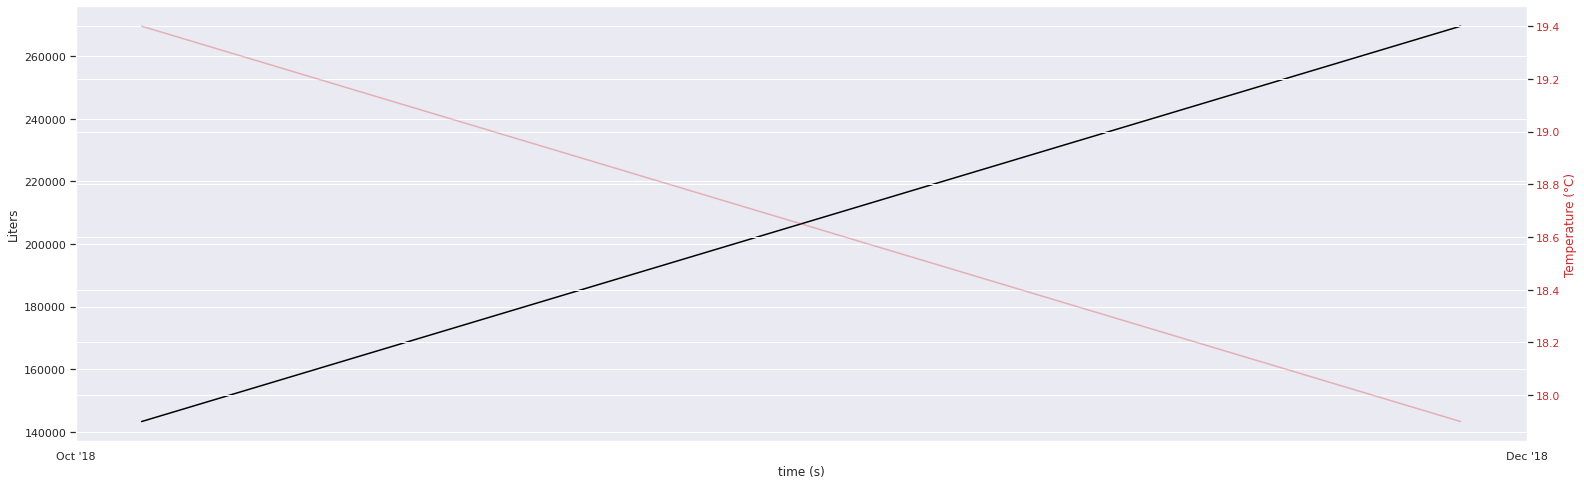

In [10]:
datos_sub = datos[datos['Filial'] == 'LAREDO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN RAFAEL**

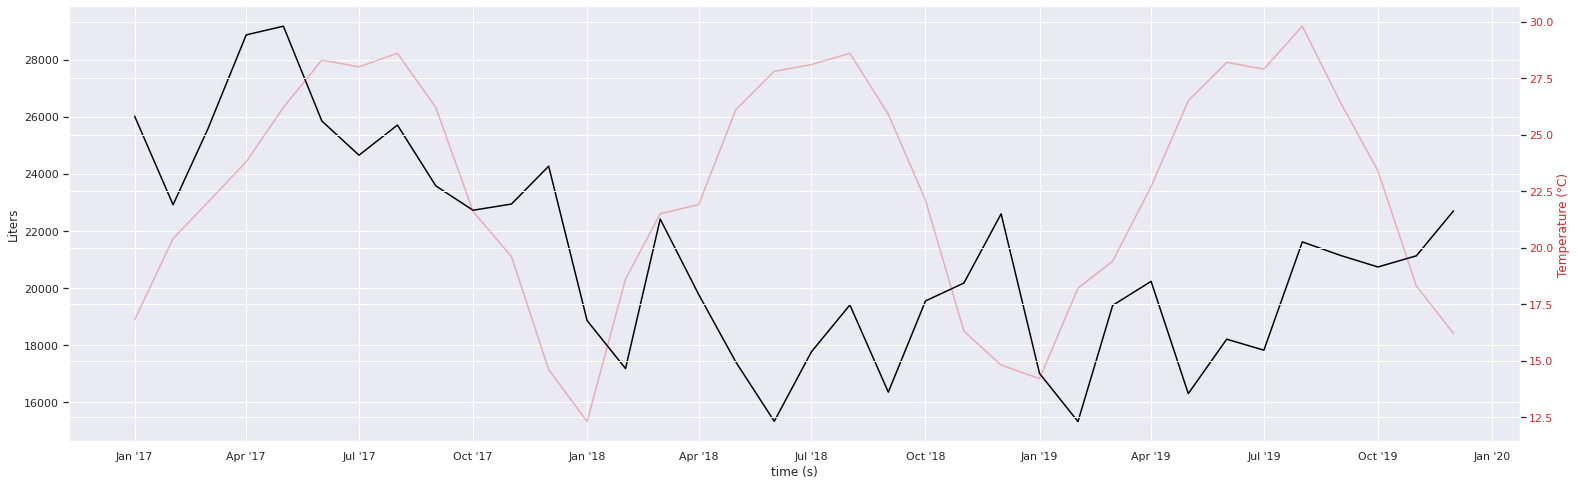

In [11]:
datos_sub = datos[datos['Filial'] == 'SAN RAFAEL']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN FERNANDO**

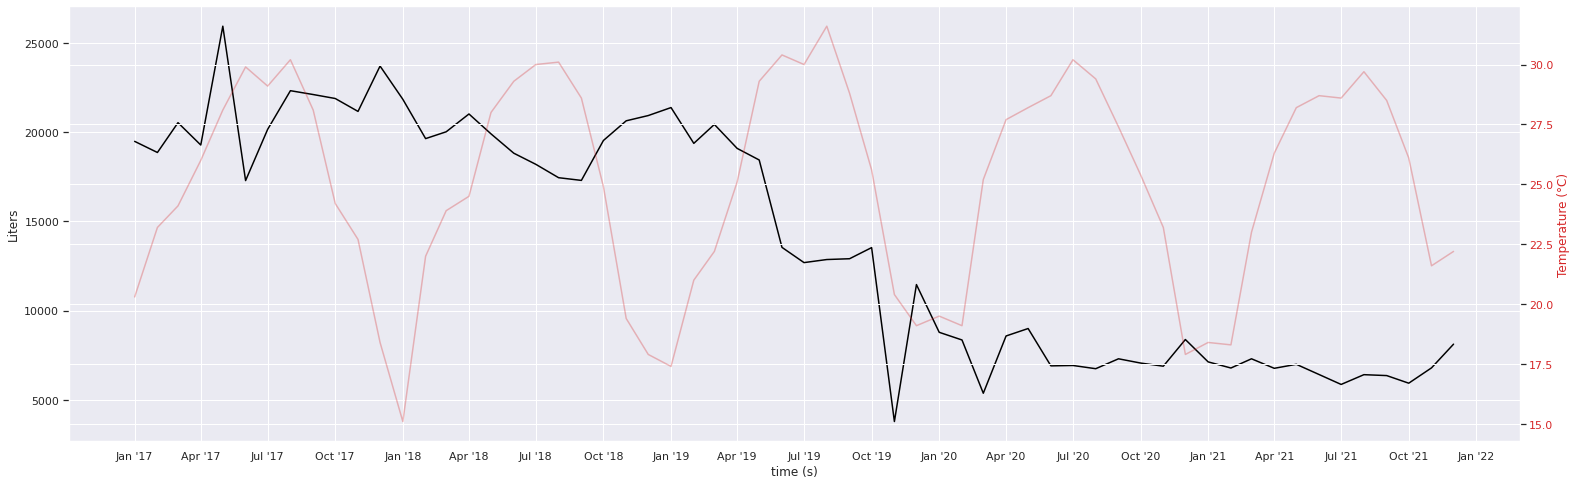

In [12]:
datos_sub = datos[datos['Filial'] == 'SAN FERNANDO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**CALPULALPAN**

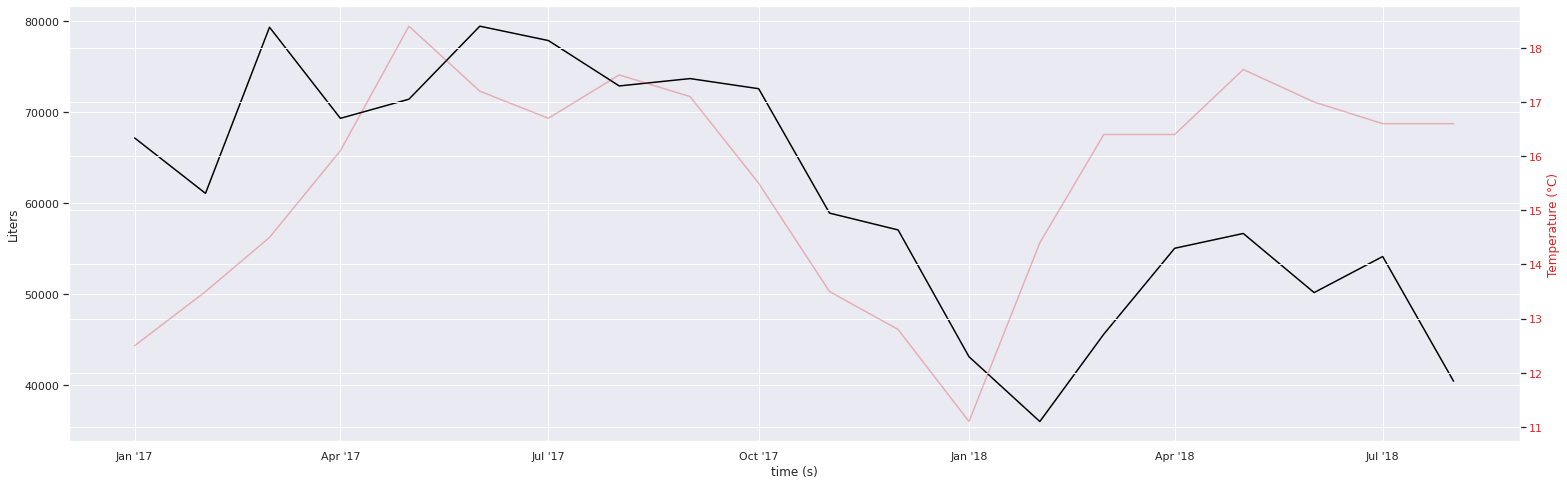

In [13]:
datos_sub = datos[datos['Filial'] == 'CALPULALPAN']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALDAMA**

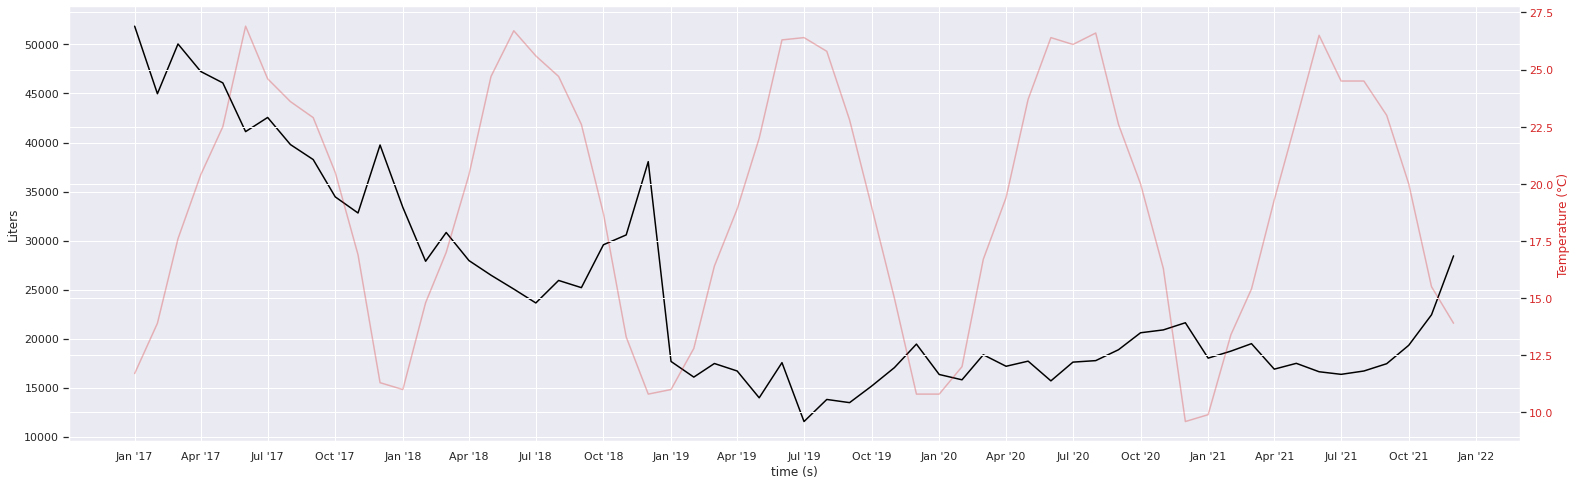

In [14]:
datos_sub = datos[datos['Filial'] == 'ALDAMA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SOTO LA MARINA**

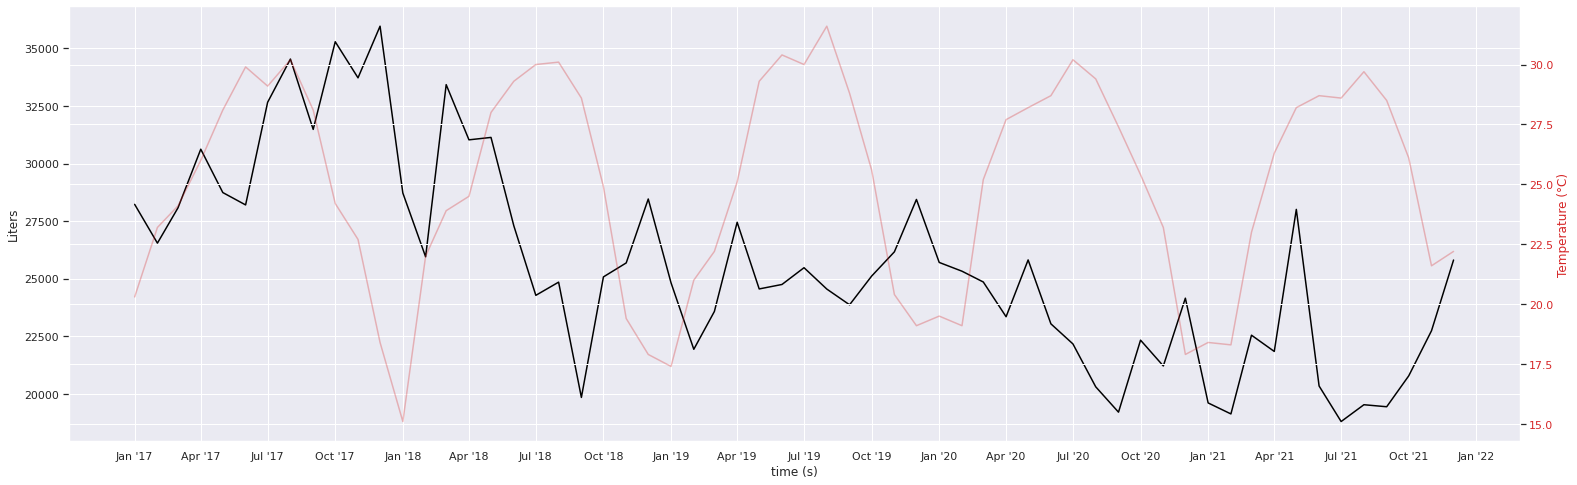

In [15]:
datos_sub = datos[datos['Filial'] == 'SOTO LA MARINA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MONCLOVA**

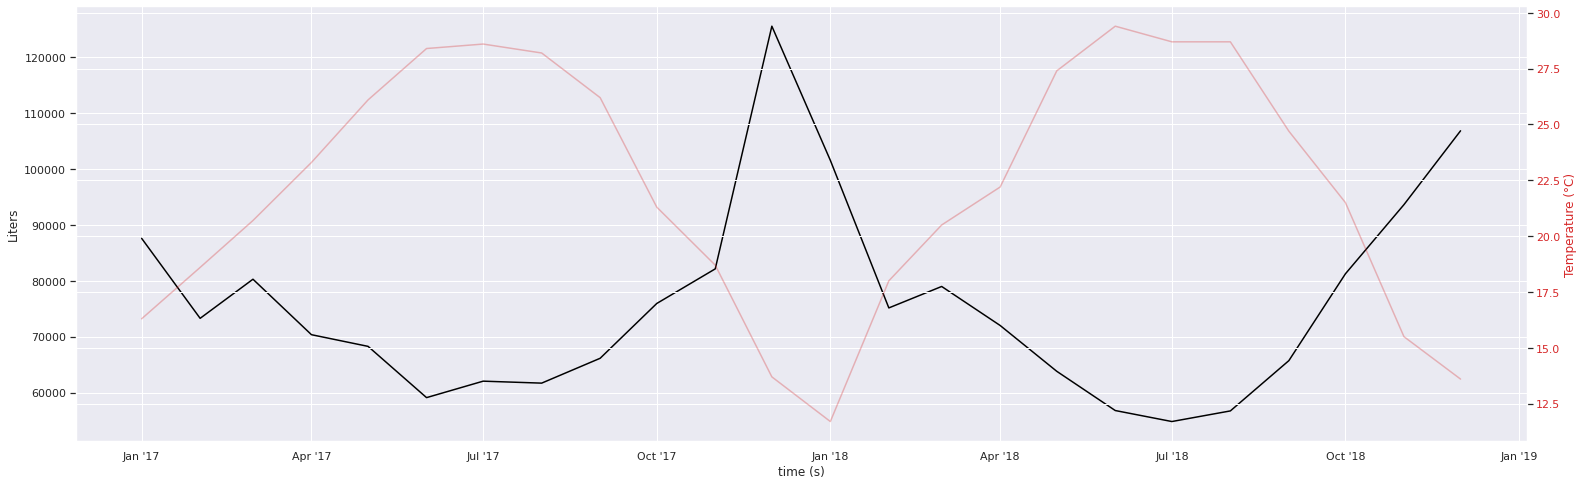

In [16]:
datos_sub = datos[datos['Filial'] == 'MONCLOVA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**Cd Valles**

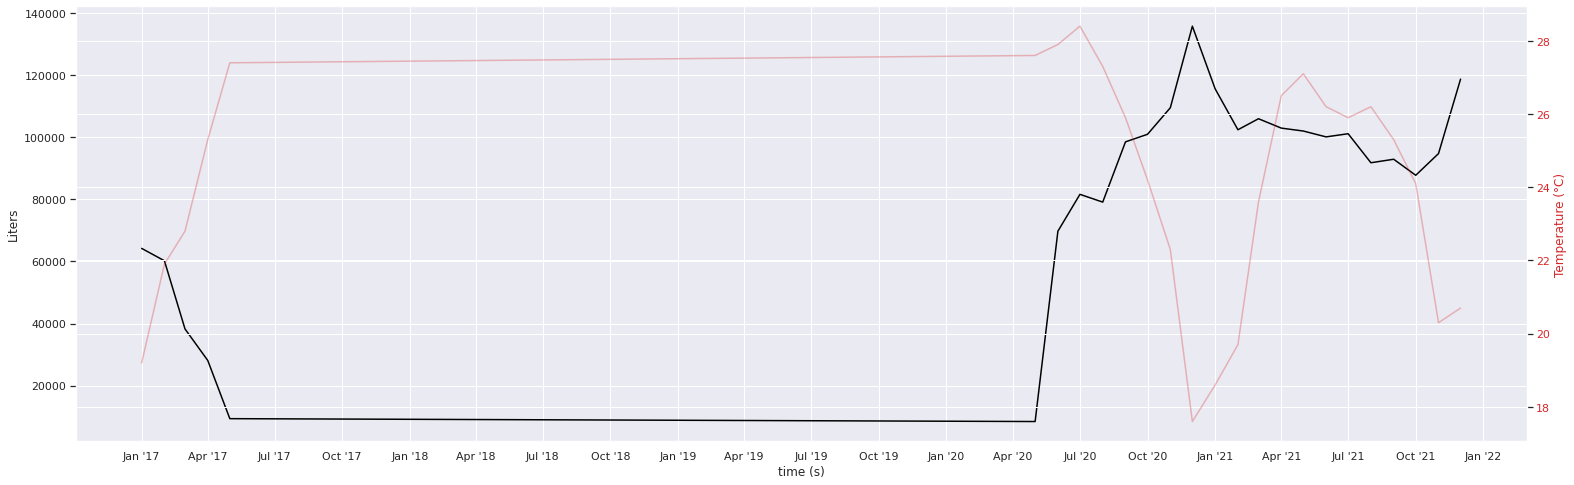

In [17]:
datos_sub = datos[datos['Filial'] == 'Cd Valles']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**VARAGAS**

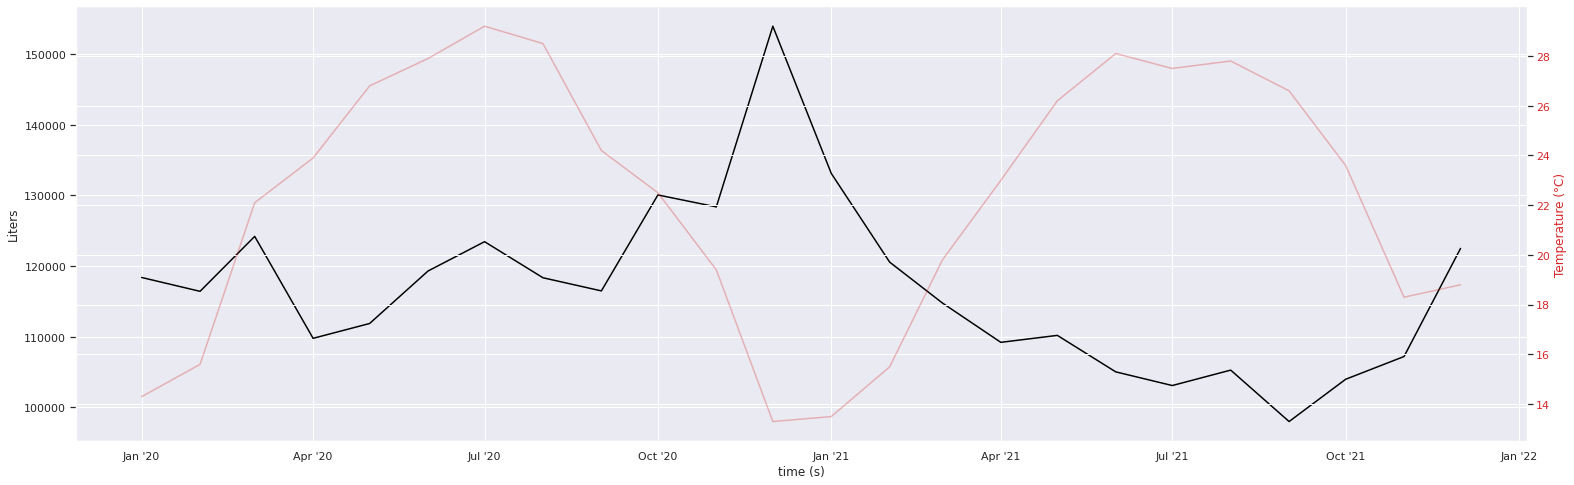

In [18]:
datos_sub = datos[datos['Filial'] == 'VARAGAS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**GALEANA**

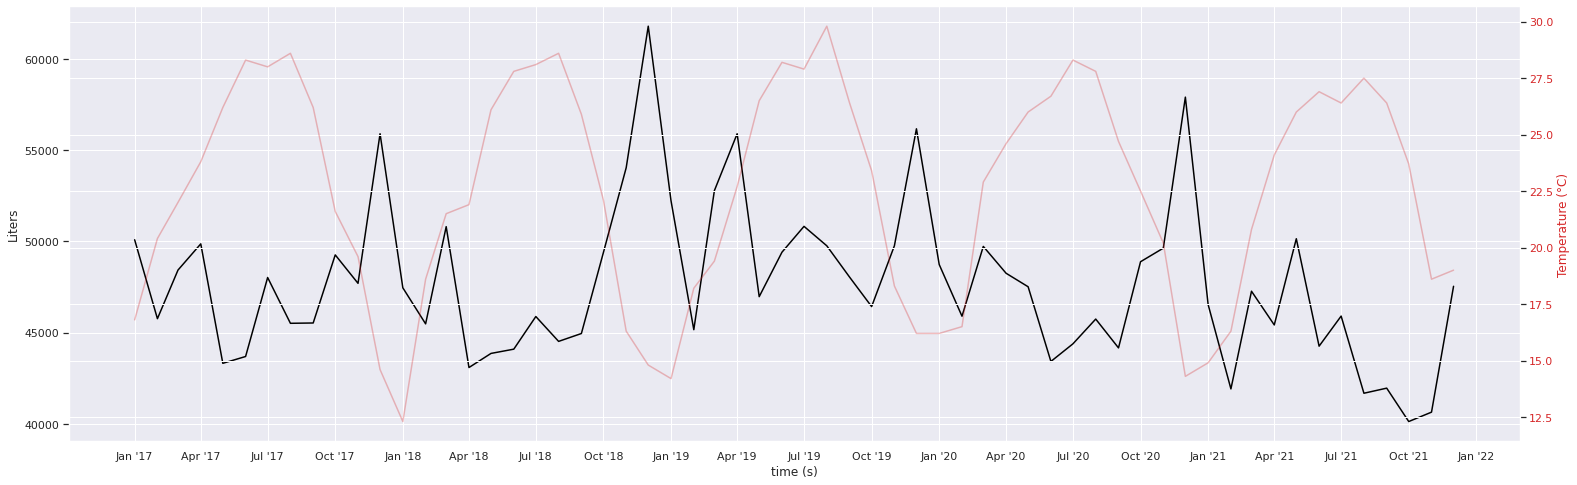

In [19]:
datos_sub = datos[datos['Filial'] == 'GALEANA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SALTILLO**

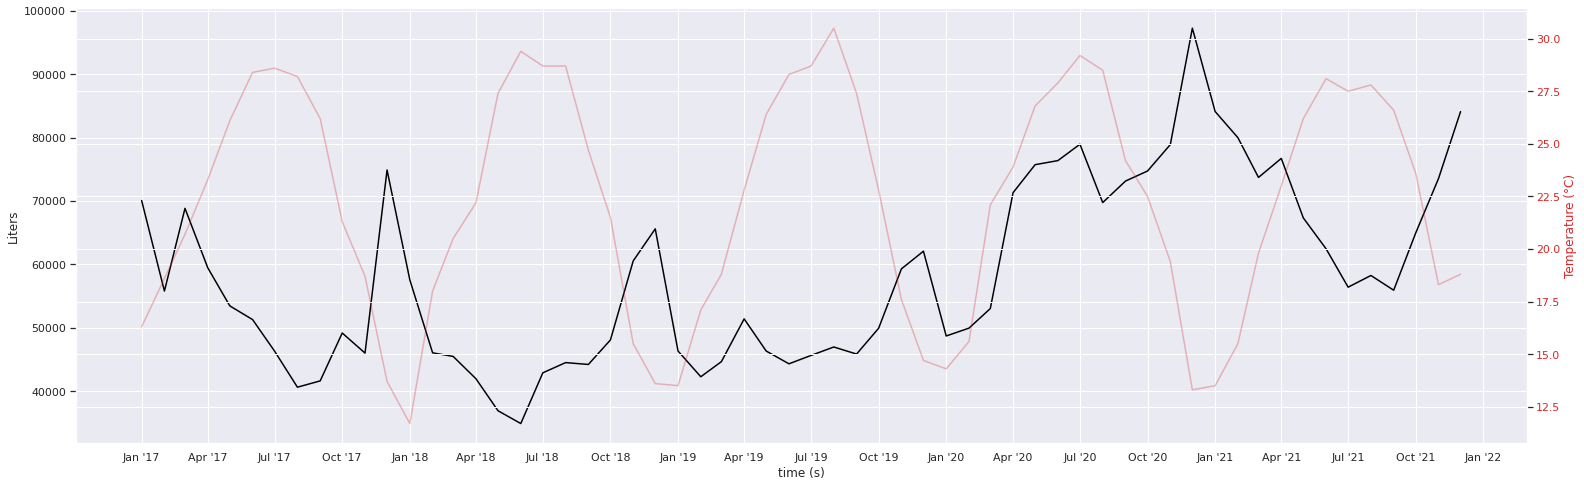

In [20]:
datos_sub = datos[datos['Filial'] == 'SALTILLO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**JIMENEZ**

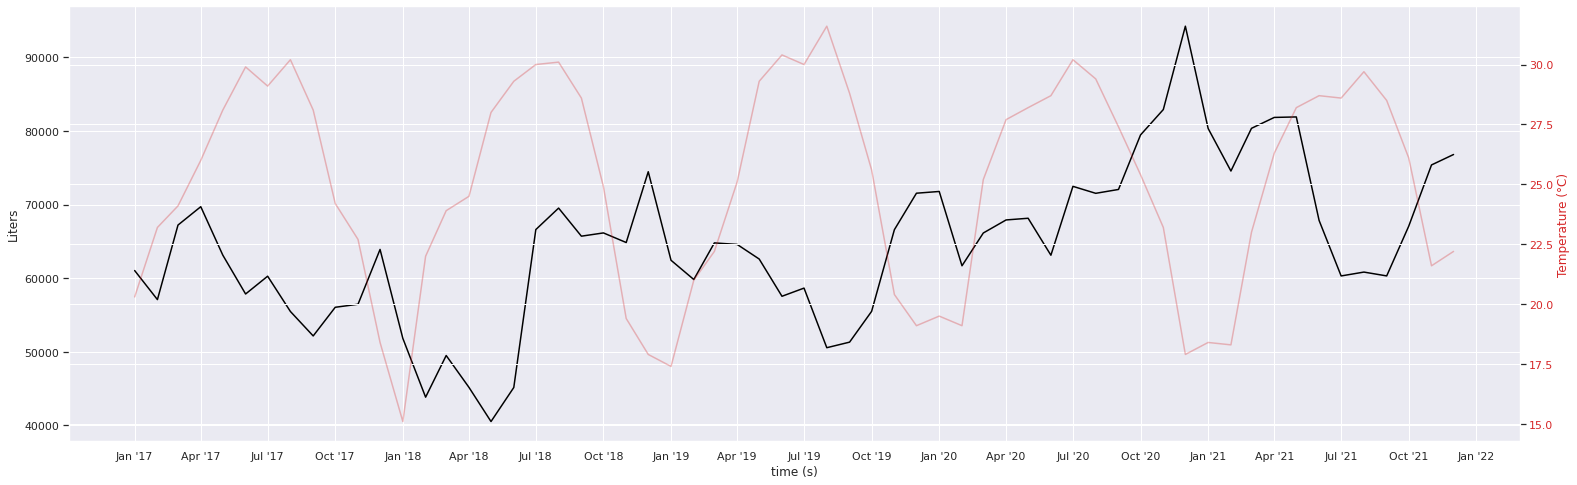

In [21]:
datos_sub = datos[datos['Filial'] == 'JIMENEZ']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN LUIS POTOSI**

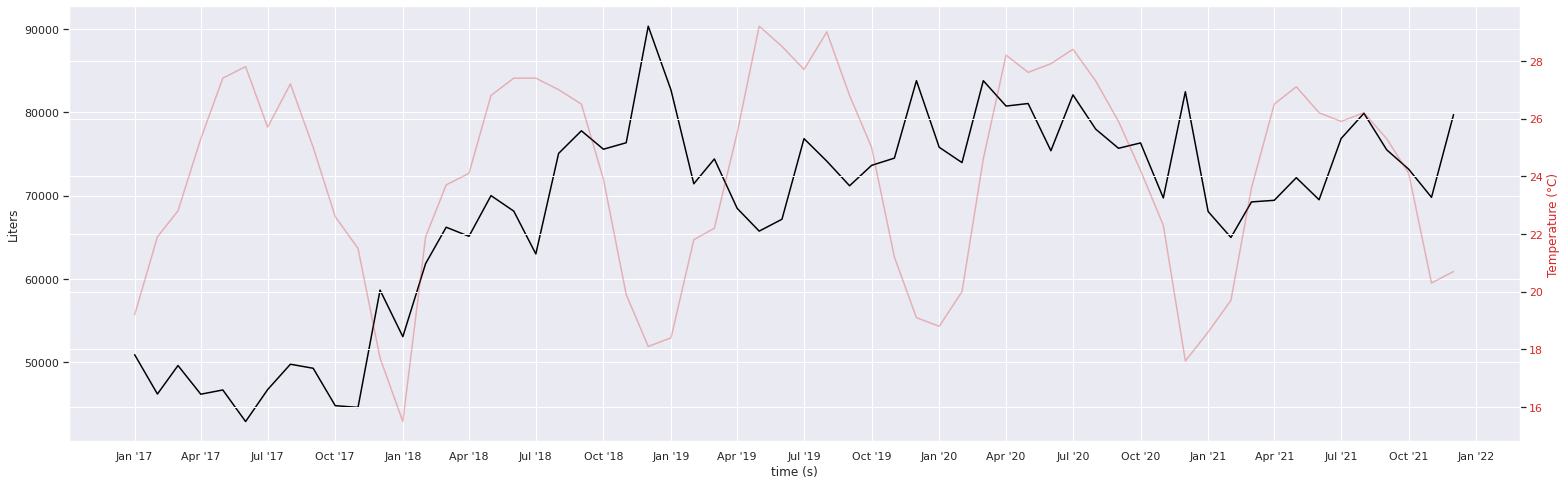

In [22]:
datos_sub = datos[datos['Filial'] == 'SAN LUIS POTOSI']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MONTEMORELOS**

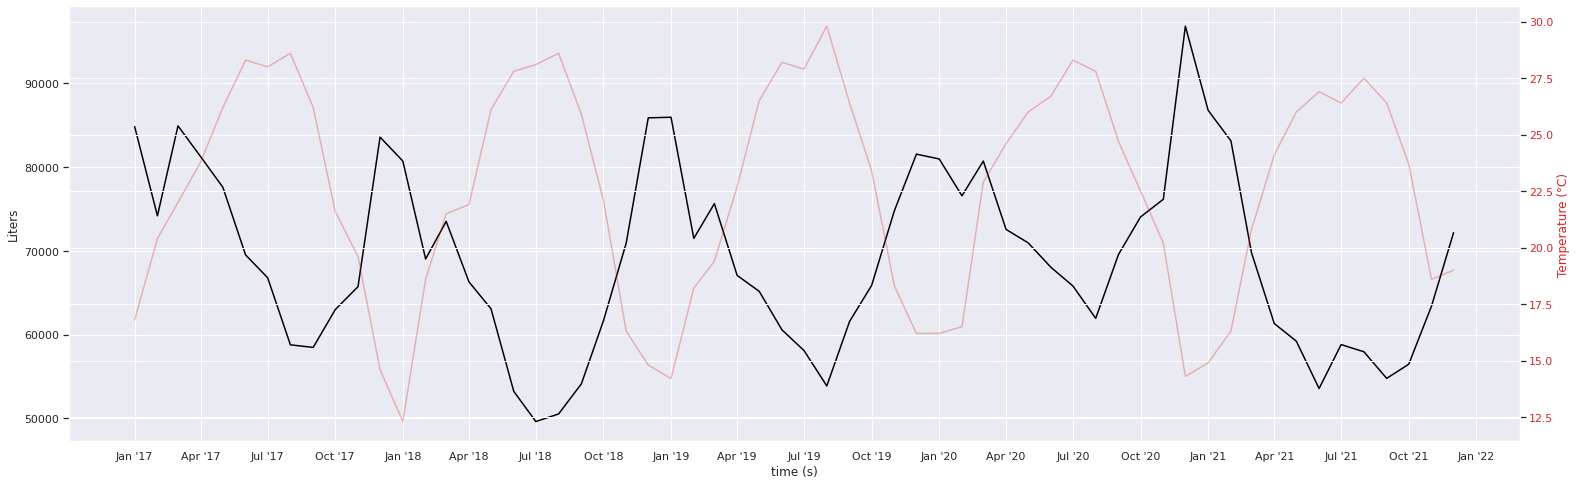

In [23]:
datos_sub = datos[datos['Filial'] == 'MONTEMORELOS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**CD. VICTORIA**

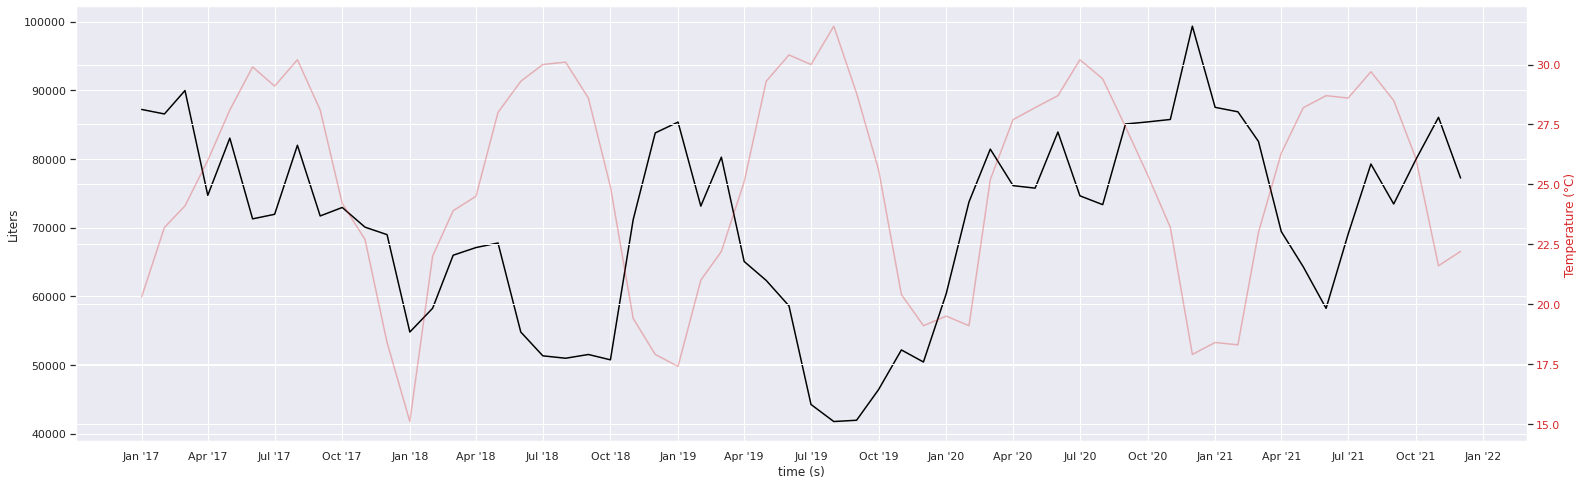

In [24]:
datos_sub = datos[datos['Filial'] == 'CD. VICTORIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALLENDE**

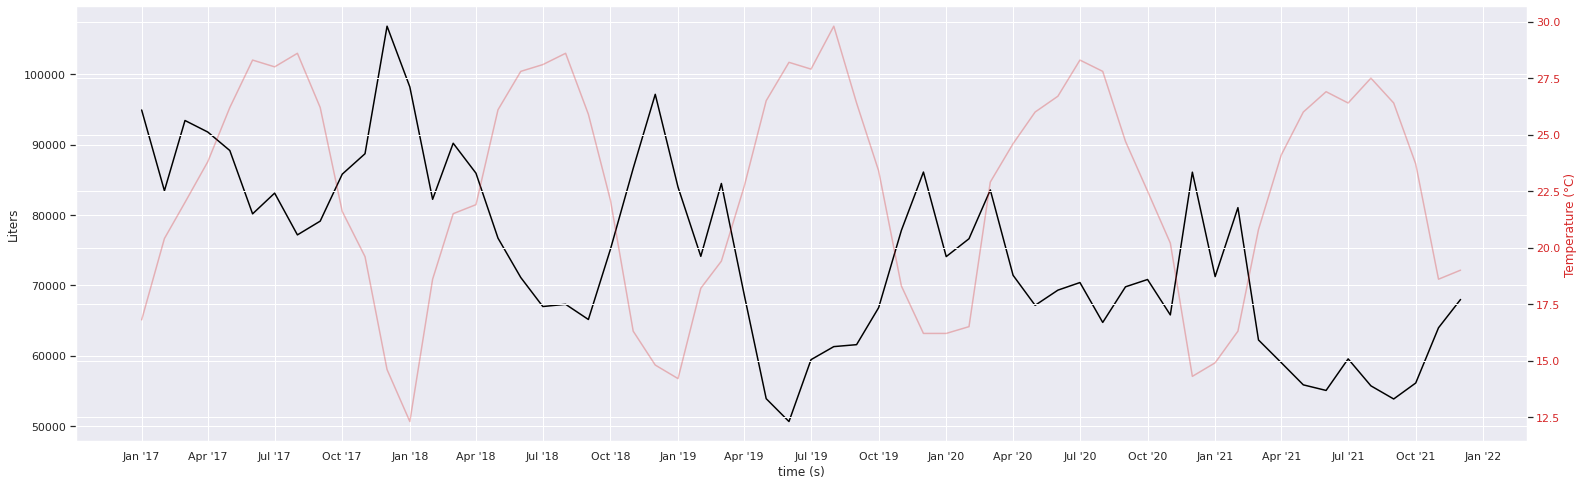

In [25]:
datos_sub = datos[datos['Filial'] == 'ALLENDE']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**HILDA G GARCIA**

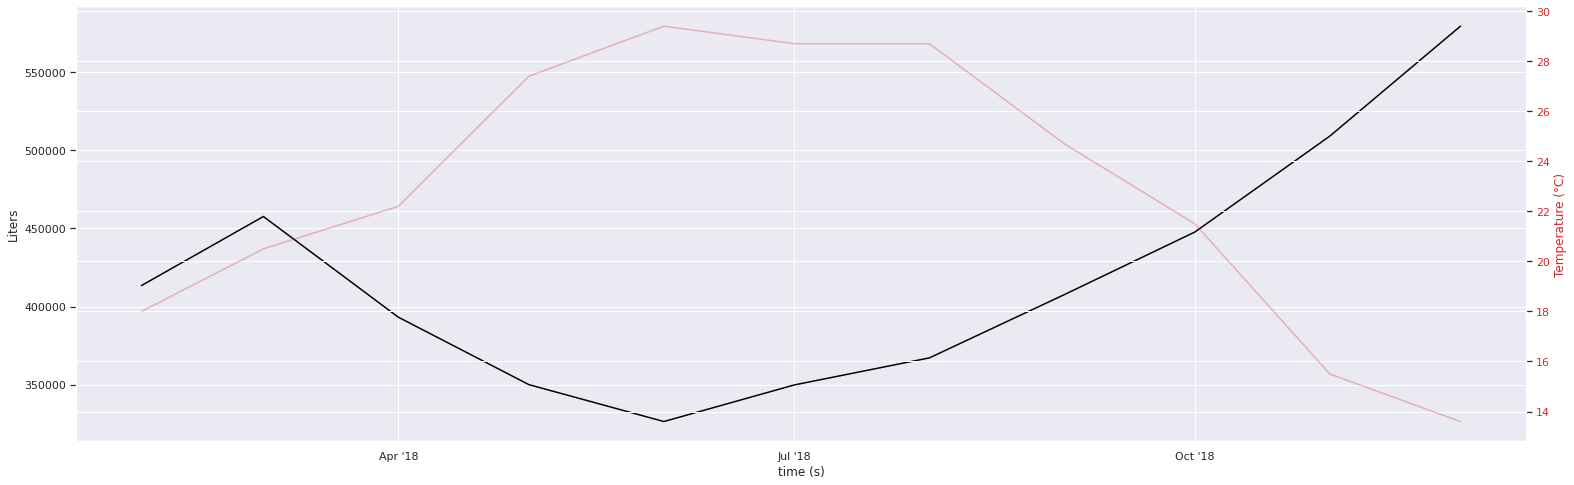

In [26]:
datos_sub = datos[datos['Filial'] == 'HILDA G GARCIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**POZA RICA**

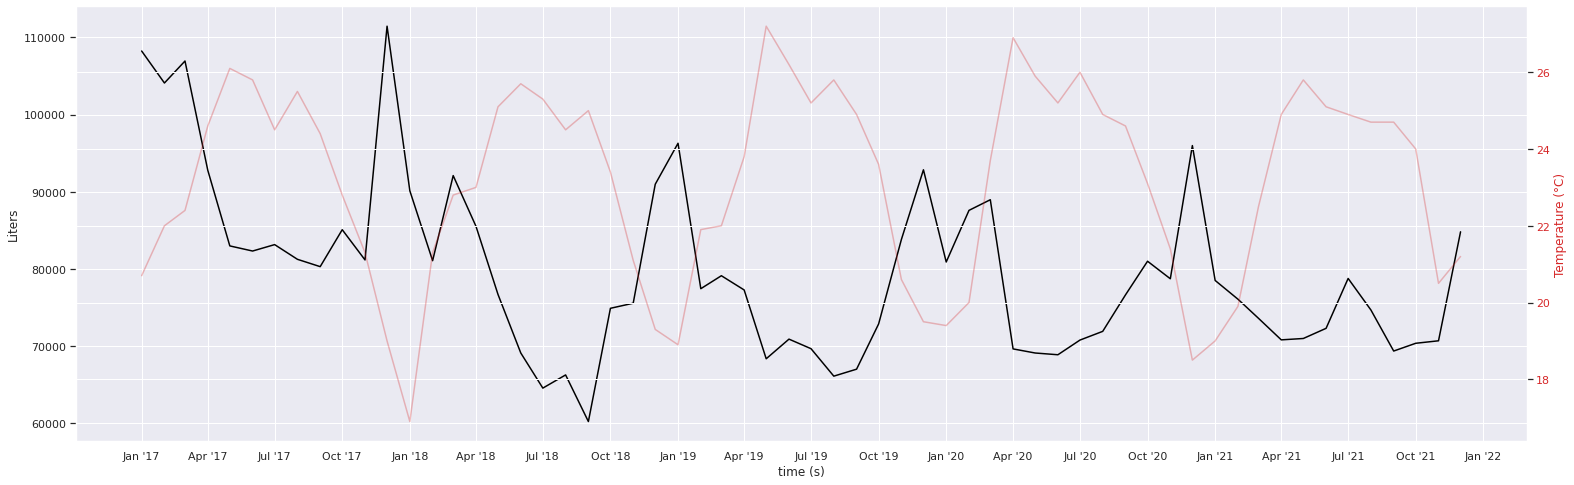

In [27]:
datos_sub = datos[datos['Filial'] == 'POZA RICA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SANTA CATARINA**

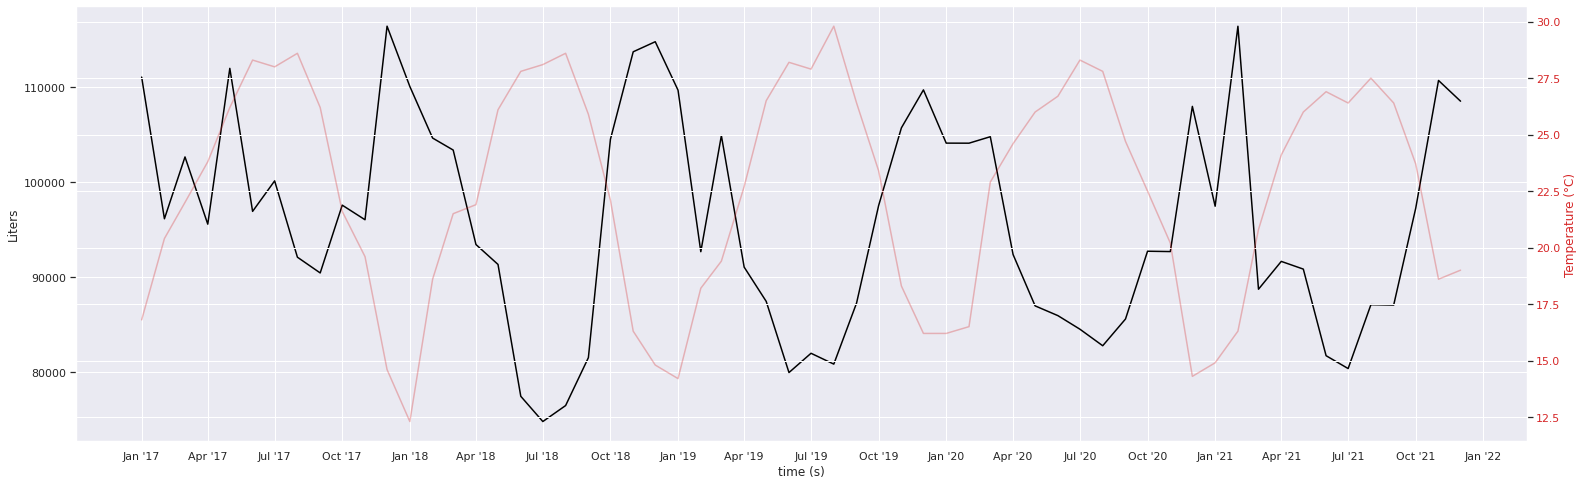

In [28]:
datos_sub = datos[datos['Filial'] == 'SANTA CATARINA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SALINA VICTORIA**

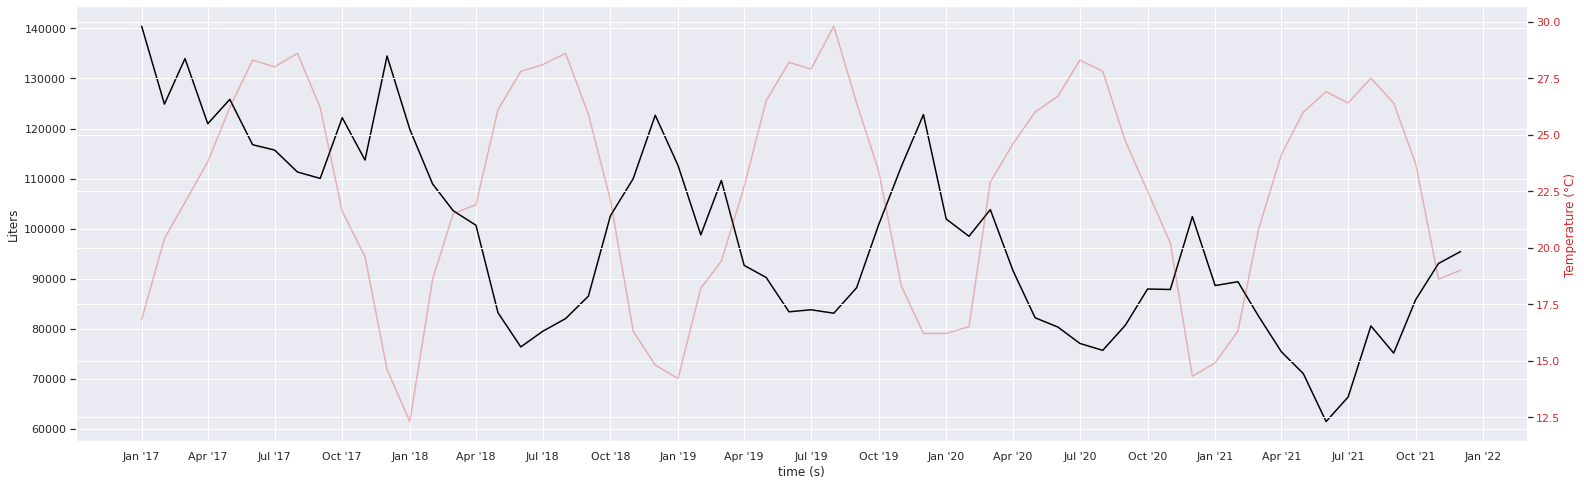

In [29]:
datos_sub = datos[datos['Filial'] == 'SALINASVICTORIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALAMO**

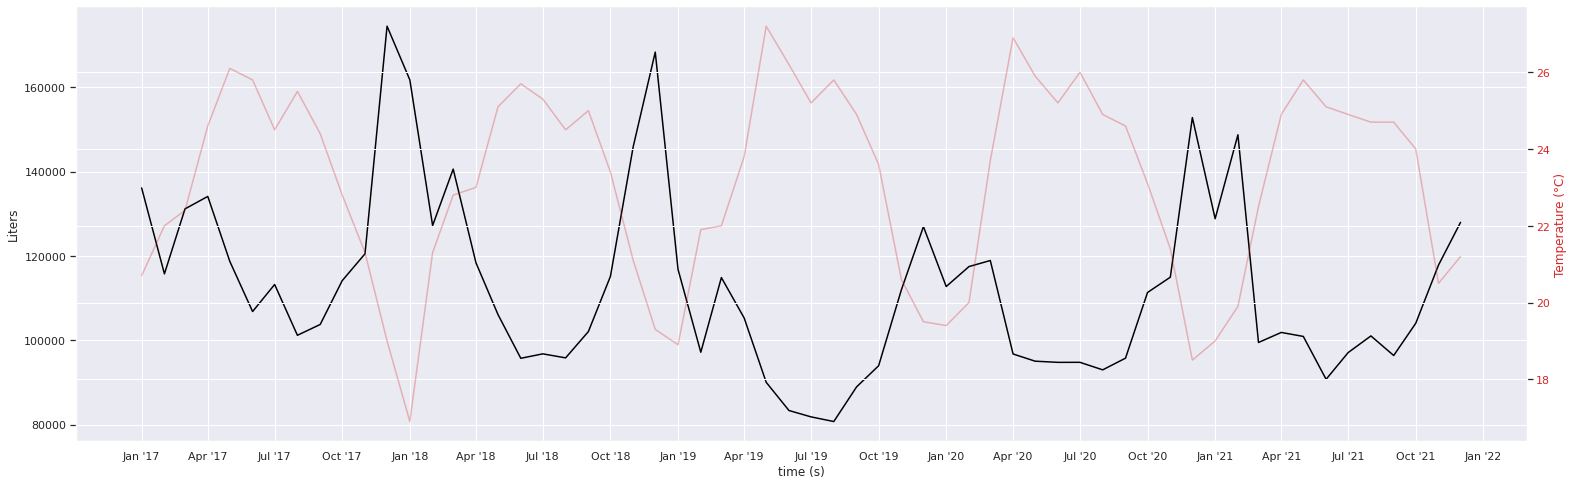

In [30]:
datos_sub = datos[datos['Filial'] == 'ALAMO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**RIO VERDE**

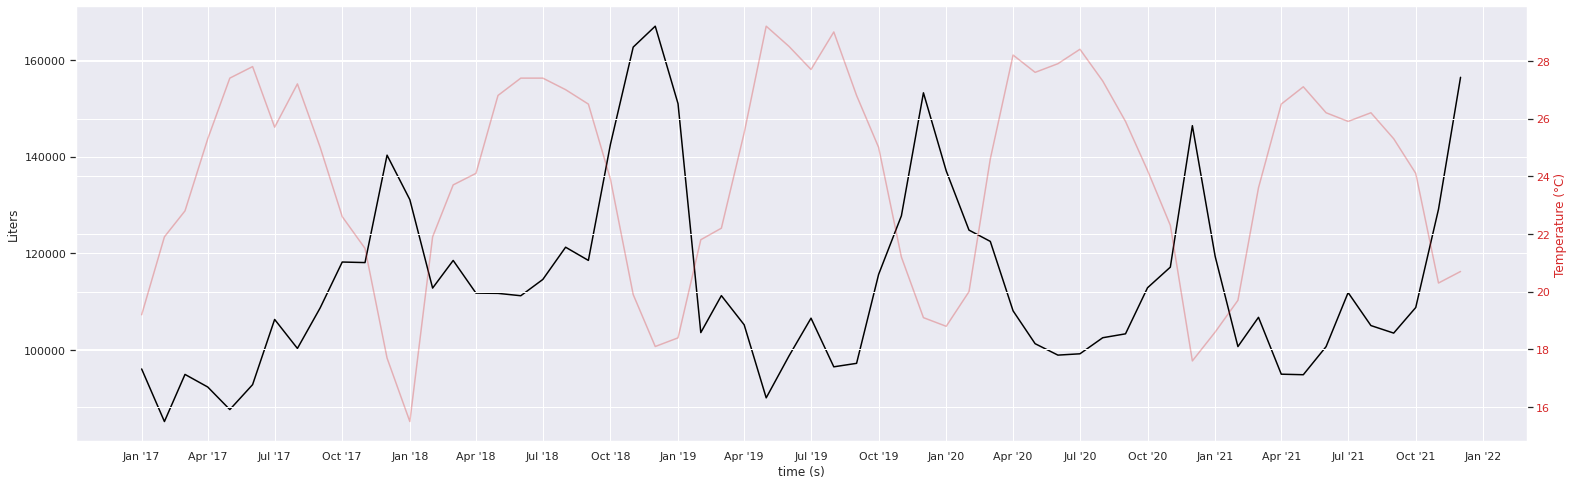

In [31]:
datos_sub = datos[datos['Filial'] == 'RIO VERDE']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**LINARES**

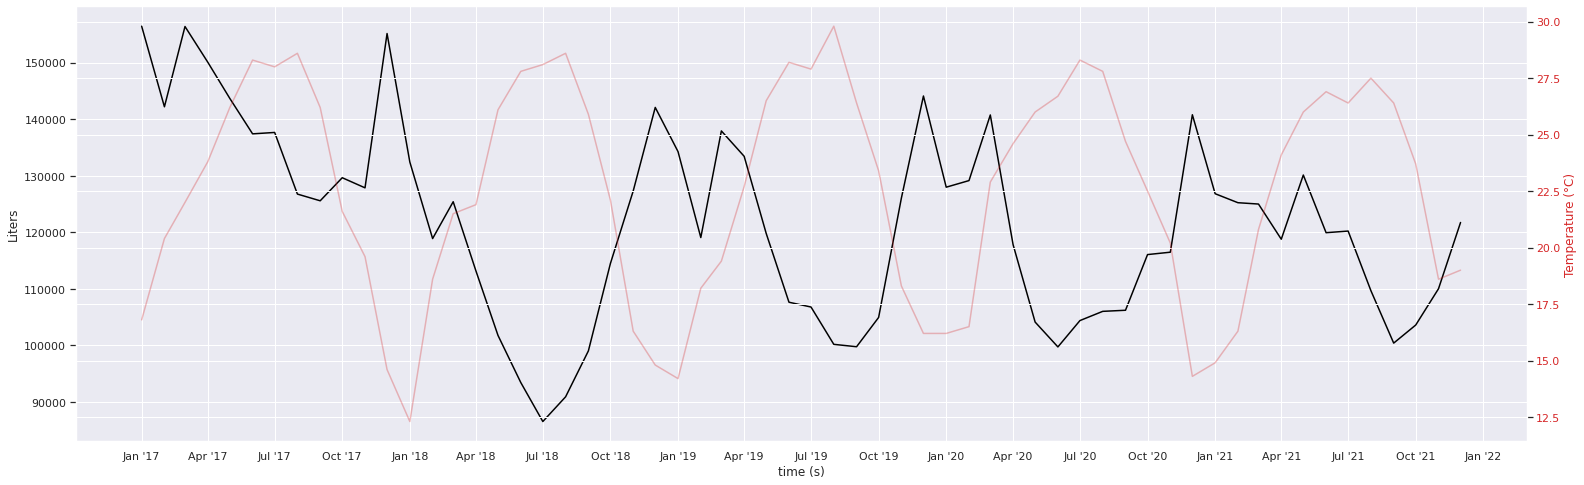

In [32]:
datos_sub = datos[datos['Filial'] == 'LINARES']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MATEHUALA**

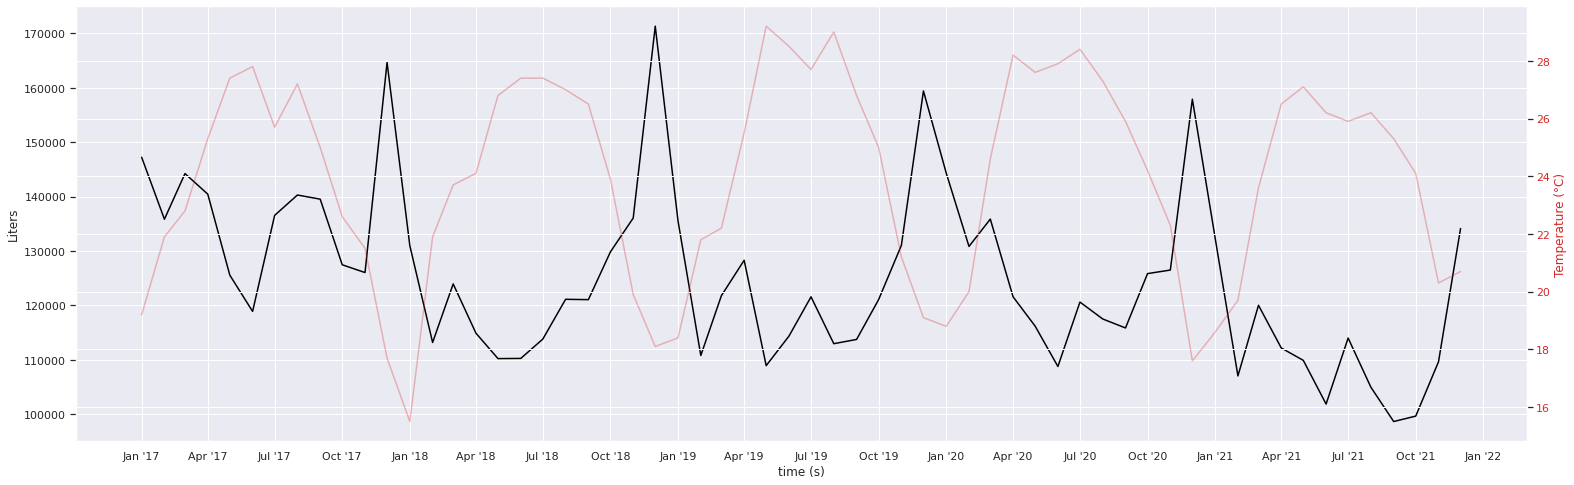

In [33]:
datos_sub = datos[datos['Filial'] == 'MATEHUALA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**TAMPICO**

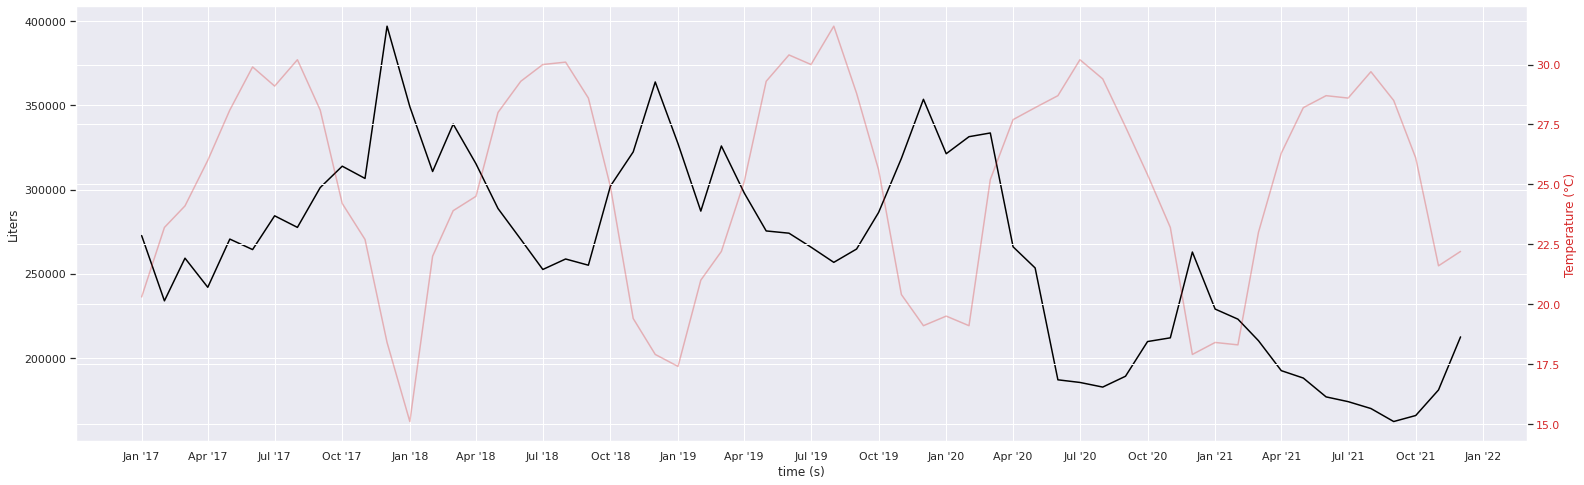

In [34]:
datos_sub = datos[datos['Filial'] == 'TAMPICO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**REYNOSA**

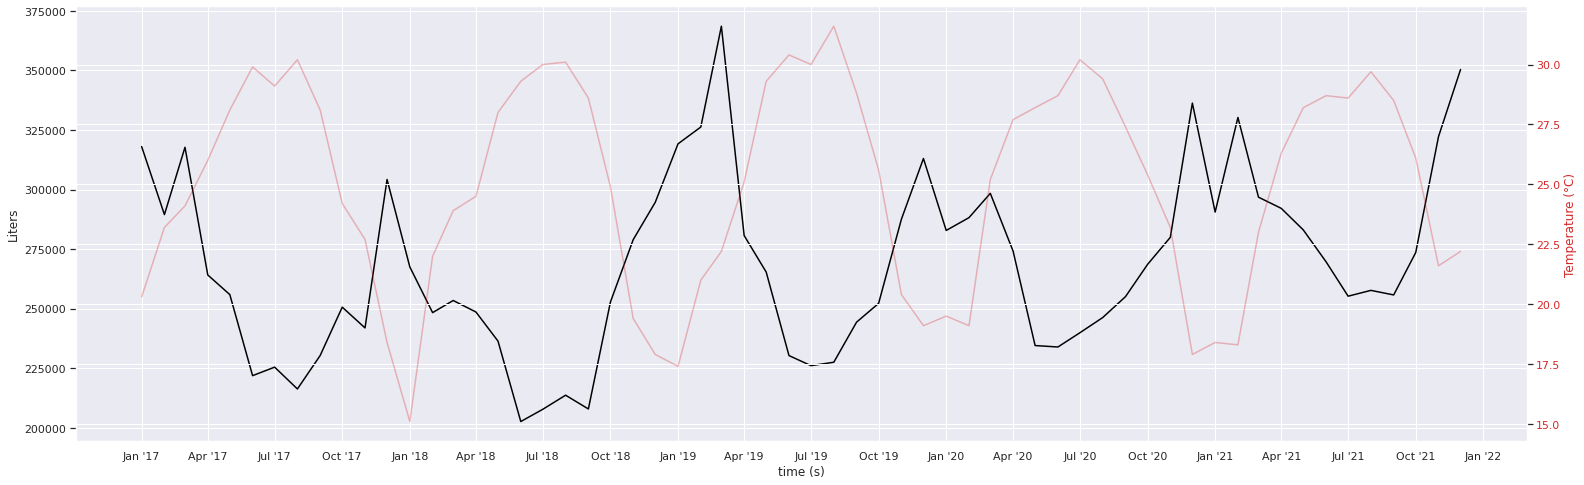

In [35]:
datos_sub = datos[datos['Filial'] == 'REYNOSA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN NICOLAS**

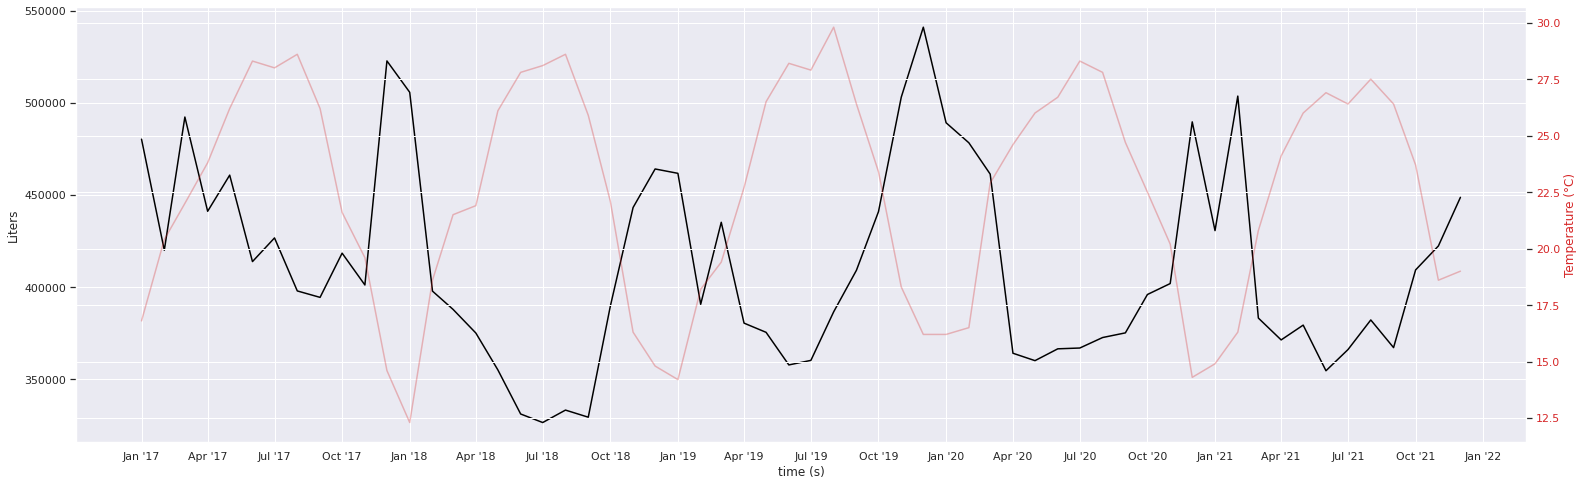

In [36]:
datos_sub = datos[datos['Filial'] == 'SAN NICOLAS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

#**Litros vs Lluvia**

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (26.0, 8.0) 

**LAREDO**

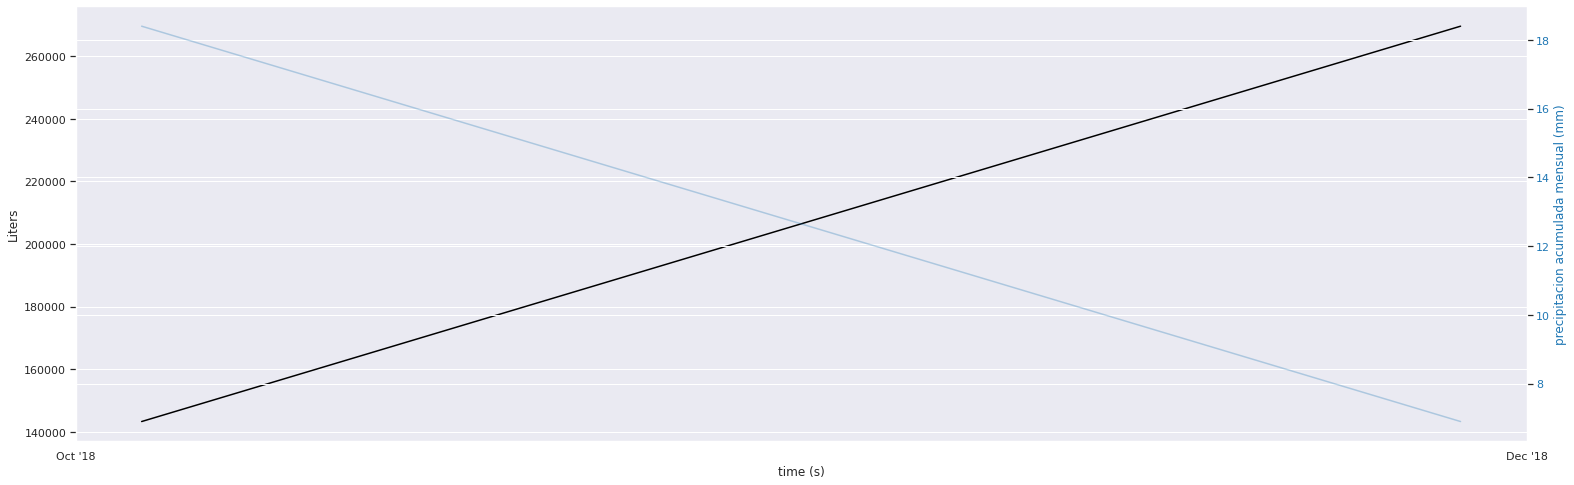

In [38]:
datos_sub = datos[datos['Filial'] == 'LAREDO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN RAFAEL**

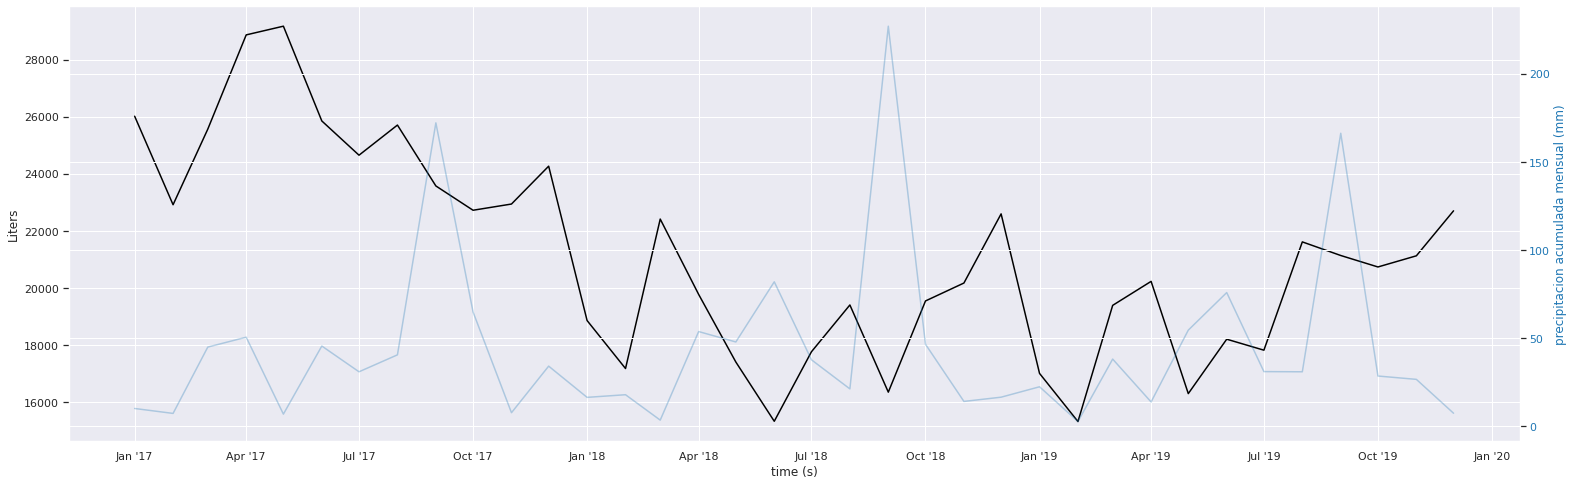

In [39]:
datos_sub = datos[datos['Filial'] == 'SAN RAFAEL']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN FERNANDO**

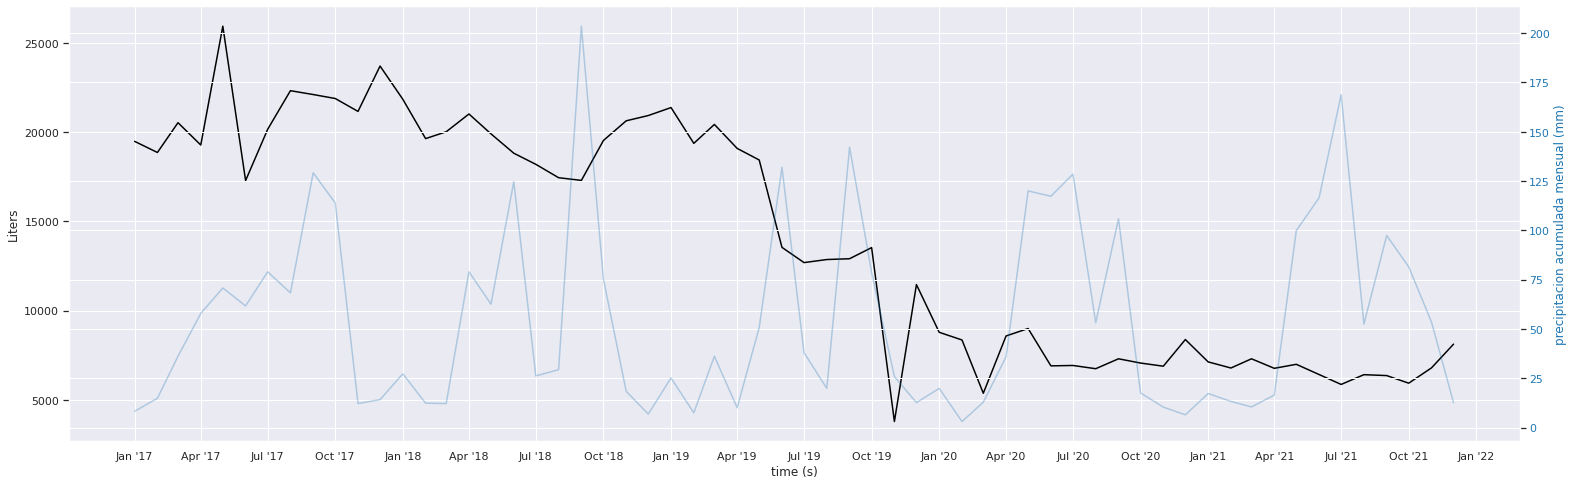

In [40]:
datos_sub = datos[datos['Filial'] == 'SAN FERNANDO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**CALPULALPAN**

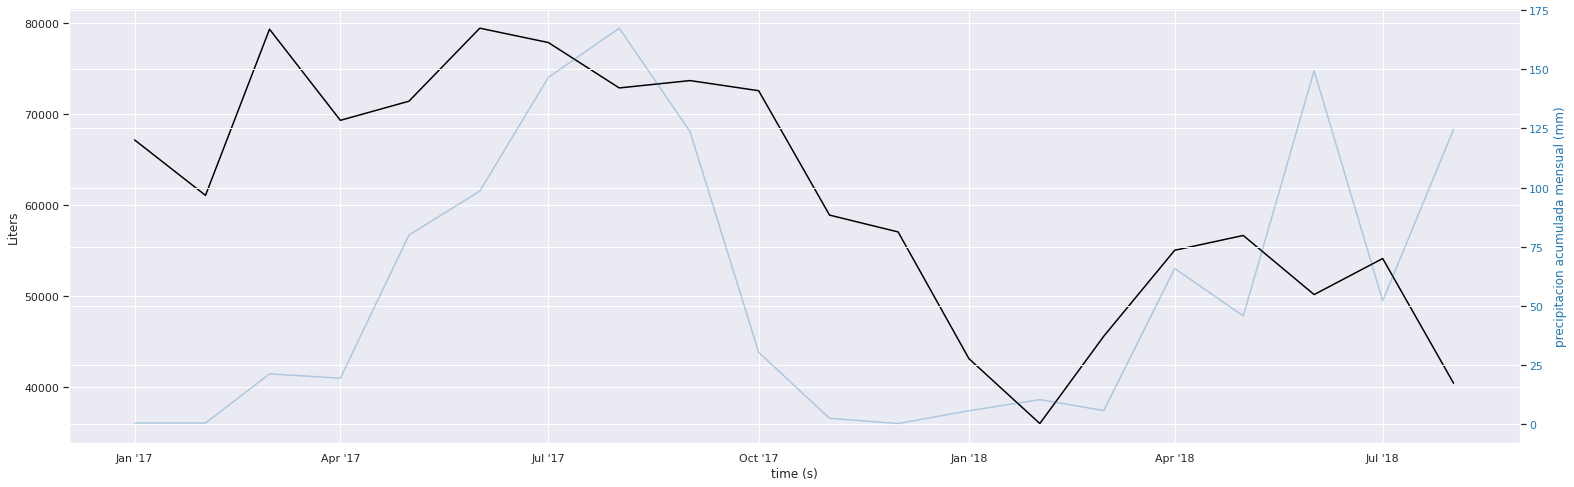

In [41]:
datos_sub = datos[datos['Filial'] == 'CALPULALPAN']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALDAMA**

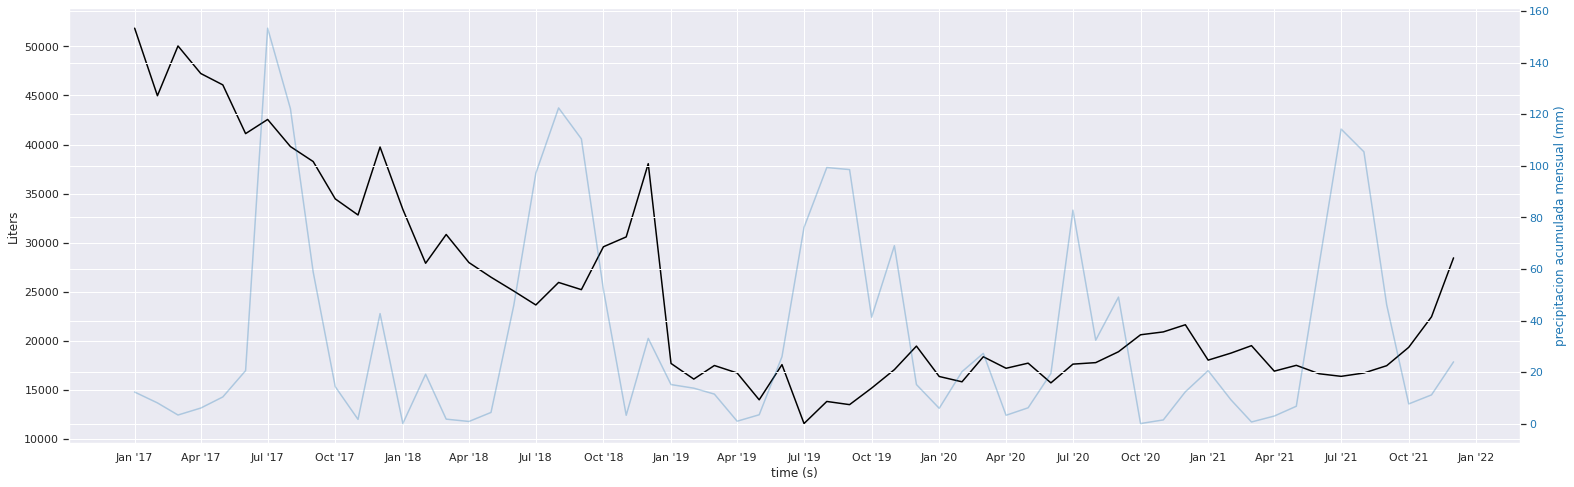

In [42]:
datos_sub = datos[datos['Filial'] == 'ALDAMA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SOTO LA MARINA**

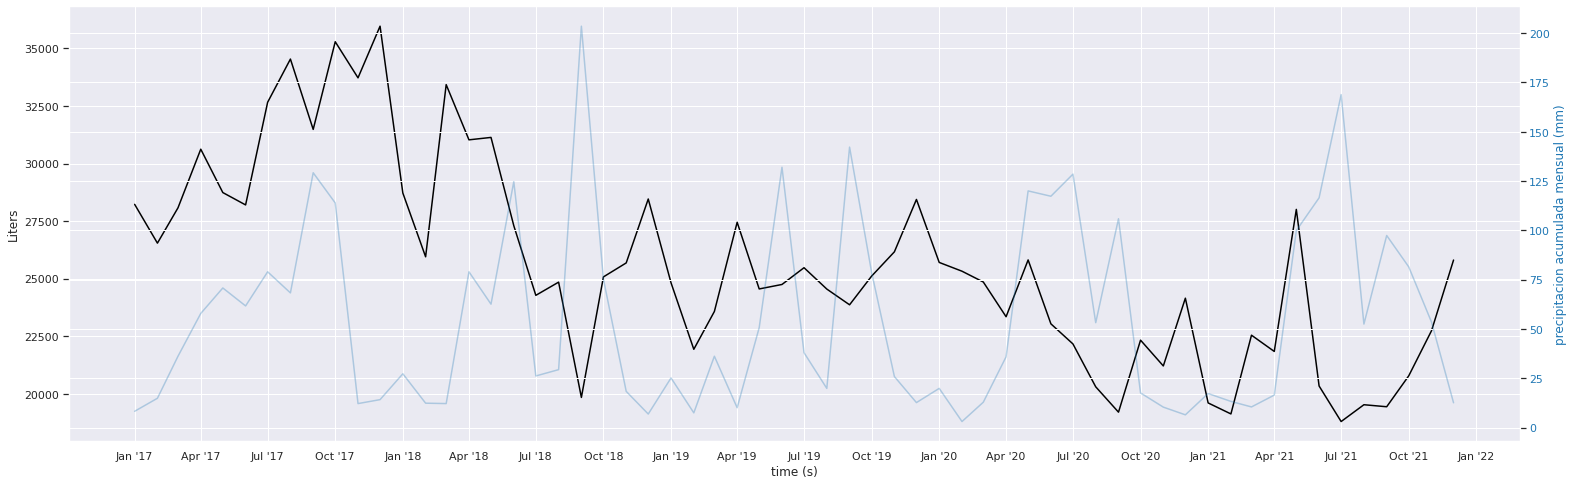

In [43]:
datos_sub = datos[datos['Filial'] == 'SOTO LA MARINA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MONCLOVA**

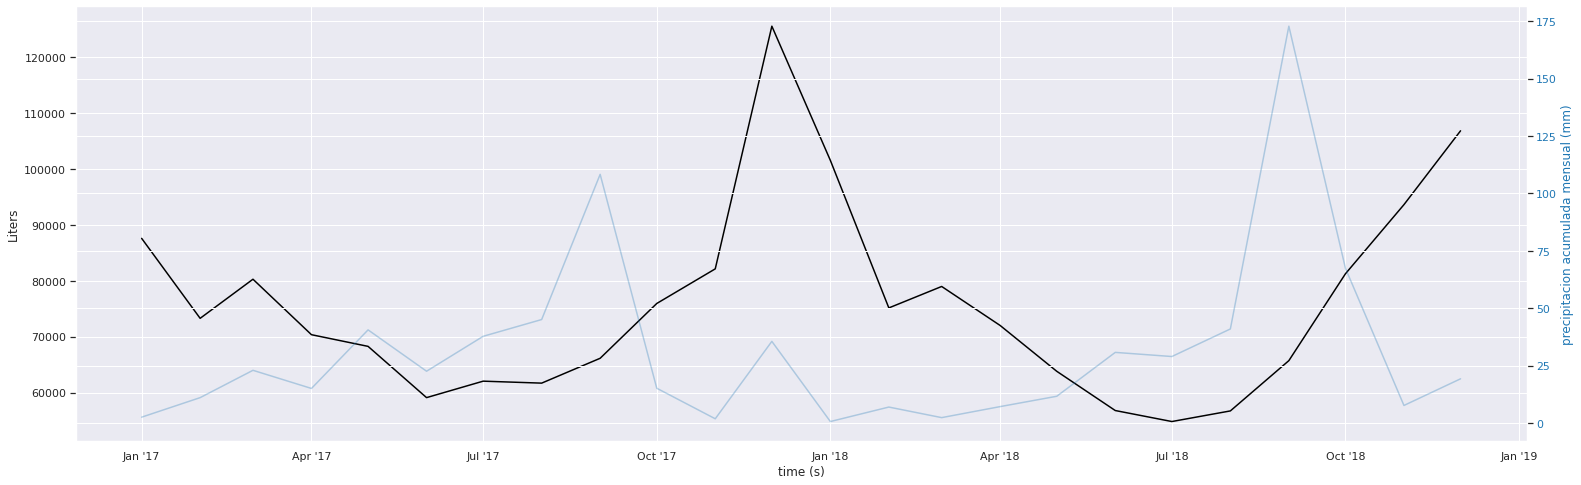

In [44]:
datos_sub = datos[datos['Filial'] == 'MONCLOVA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**Cd Valles**

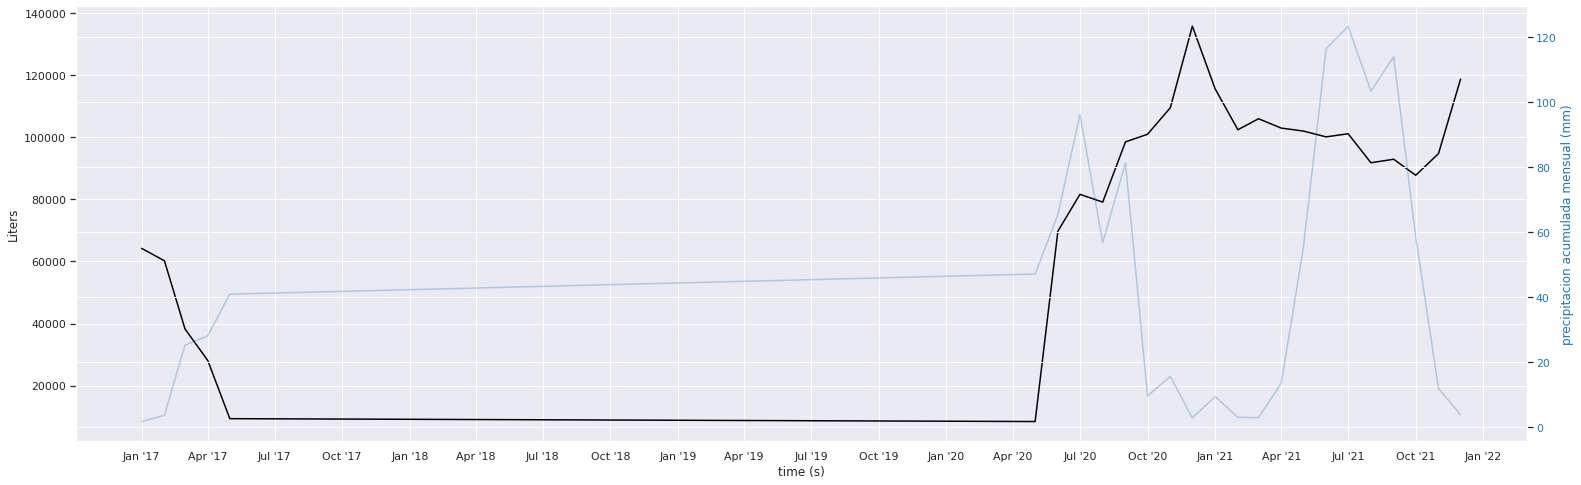

In [45]:
datos_sub = datos[datos['Filial'] == 'Cd Valles']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**VARAGAS**

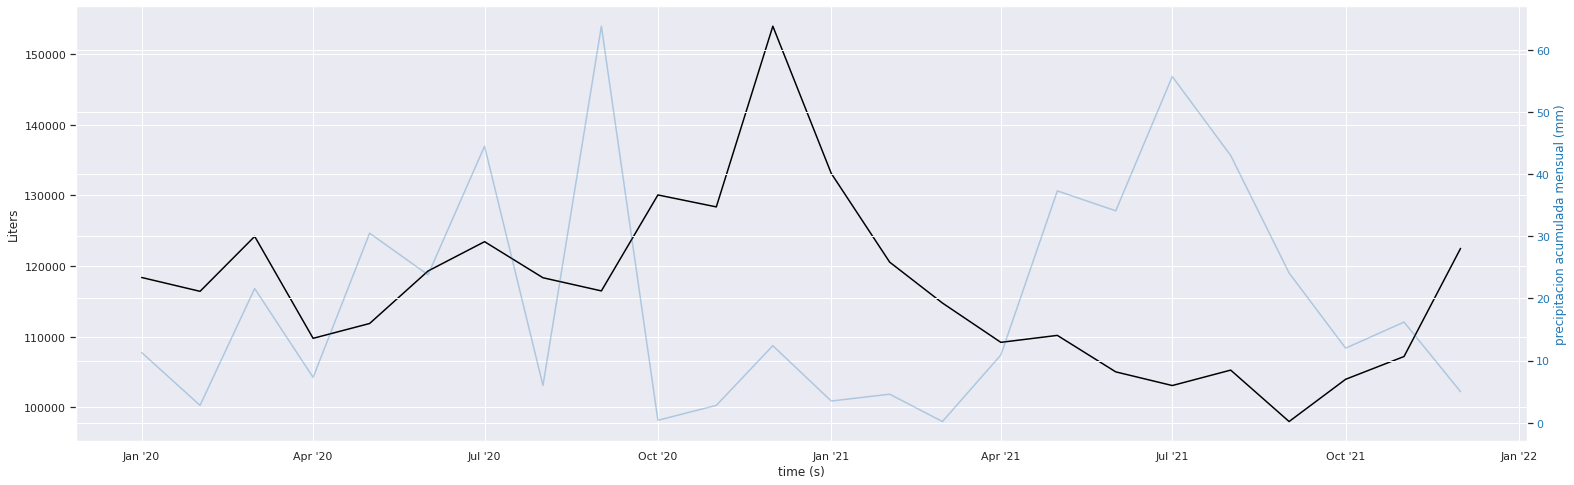

In [46]:
datos_sub = datos[datos['Filial'] == 'VARAGAS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**GALEANA**

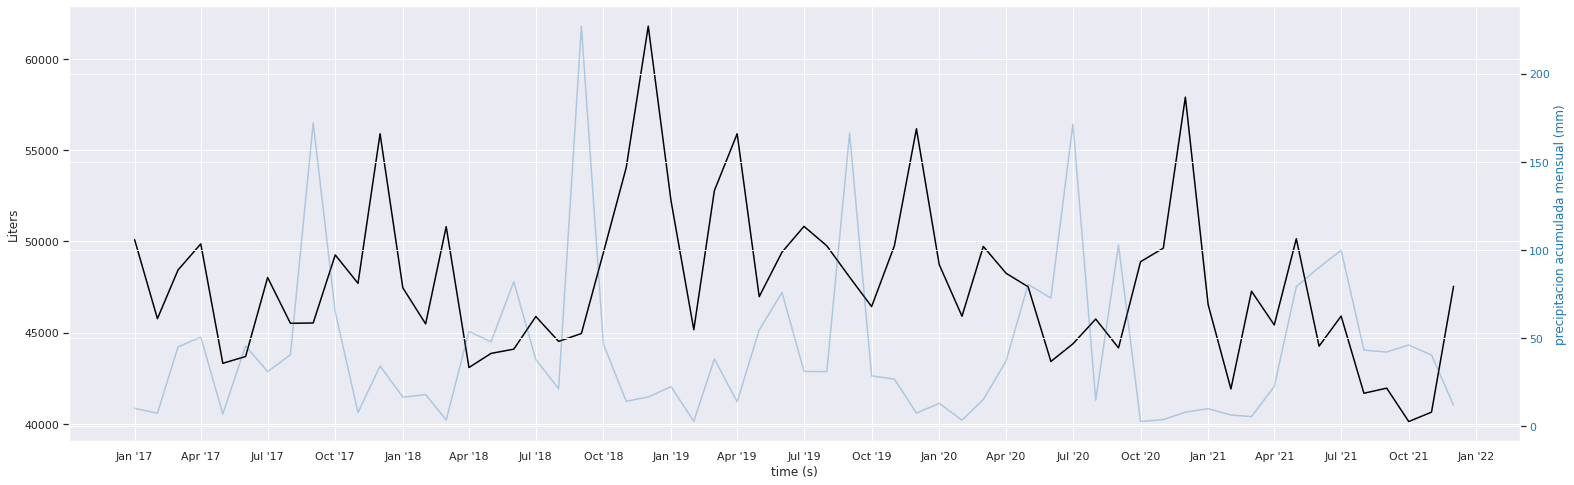

In [47]:
datos_sub = datos[datos['Filial'] == 'GALEANA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SALTILLO**

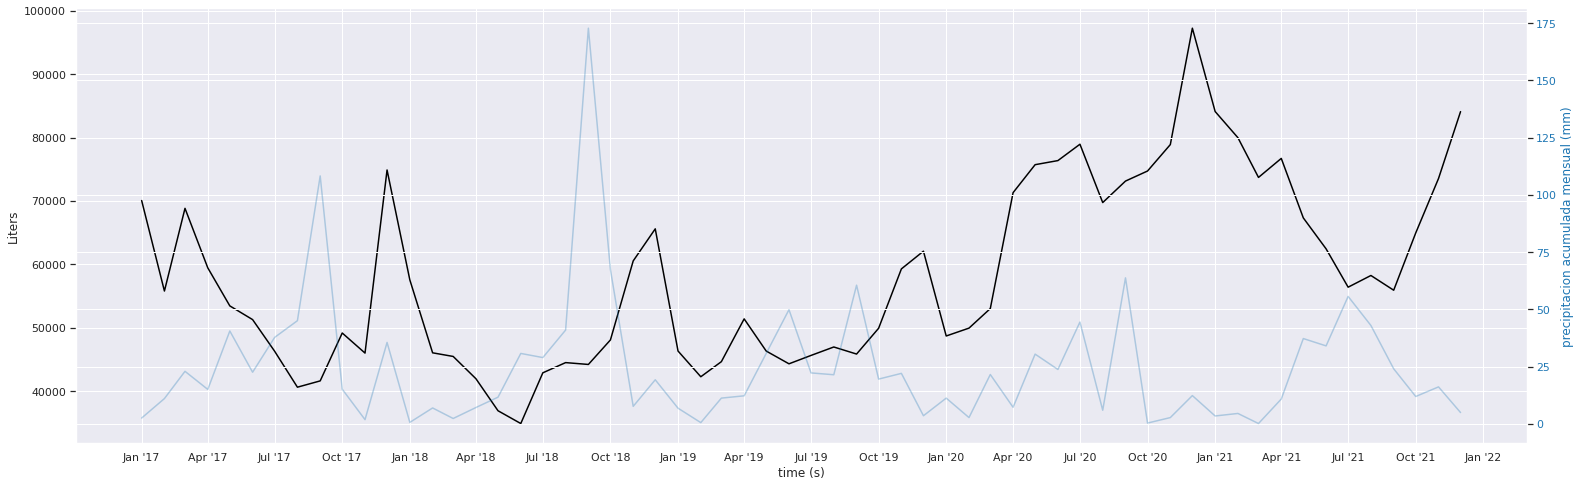

In [48]:
datos_sub = datos[datos['Filial'] == 'SALTILLO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**JIMENEZ**

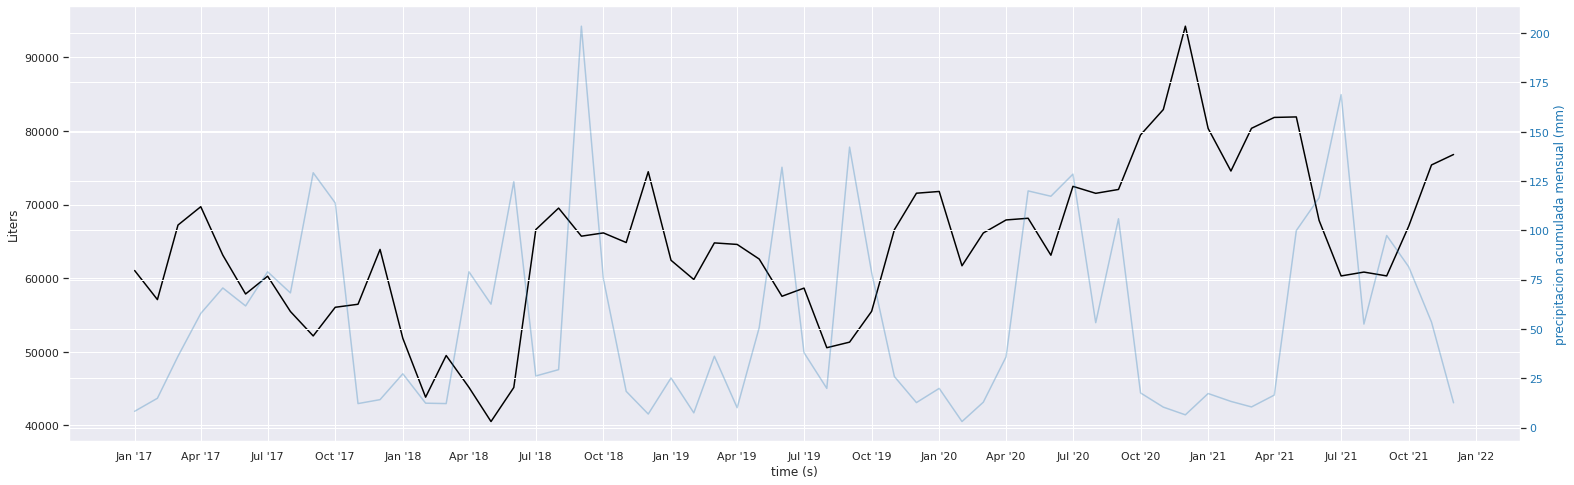

In [49]:
datos_sub = datos[datos['Filial'] == 'JIMENEZ']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN LUIS POTOSI**

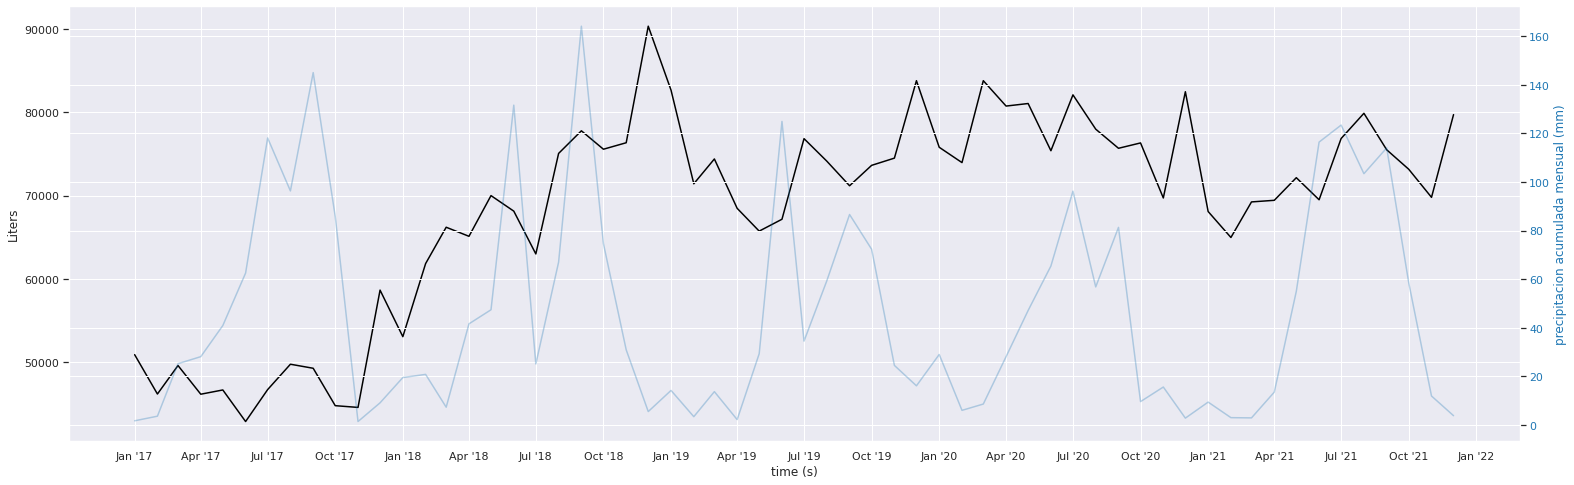

In [50]:
datos_sub = datos[datos['Filial'] == 'SAN LUIS POTOSI']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MONTEMORELOS**

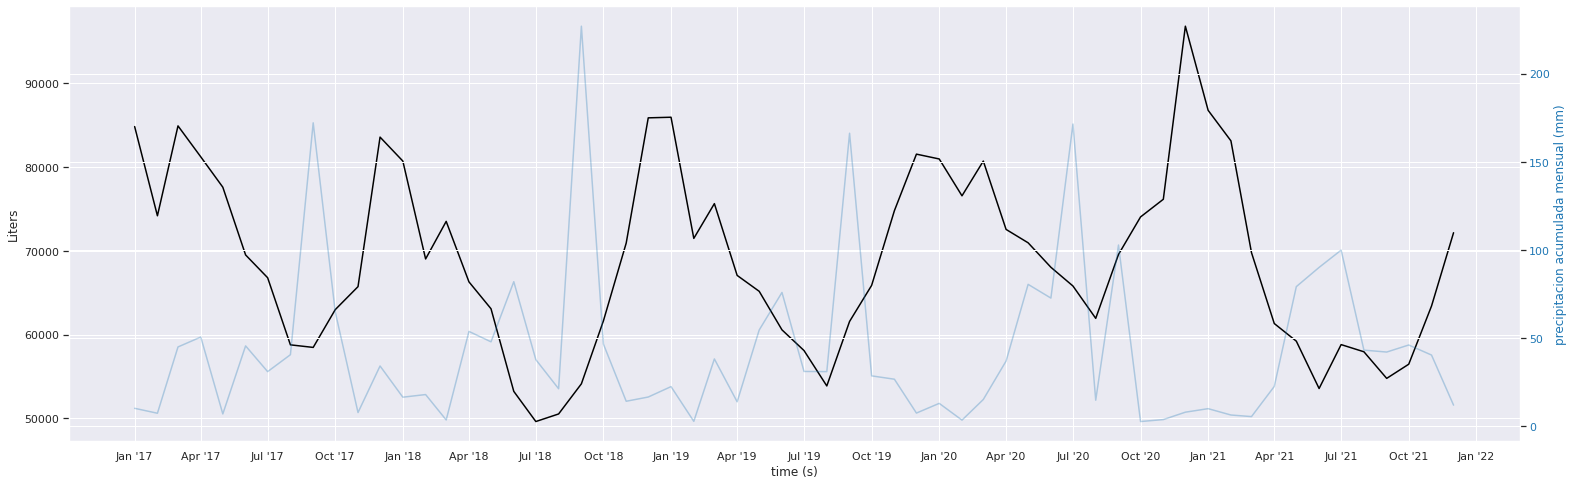

In [51]:
datos_sub = datos[datos['Filial'] == 'MONTEMORELOS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**CD. VICTORIA**

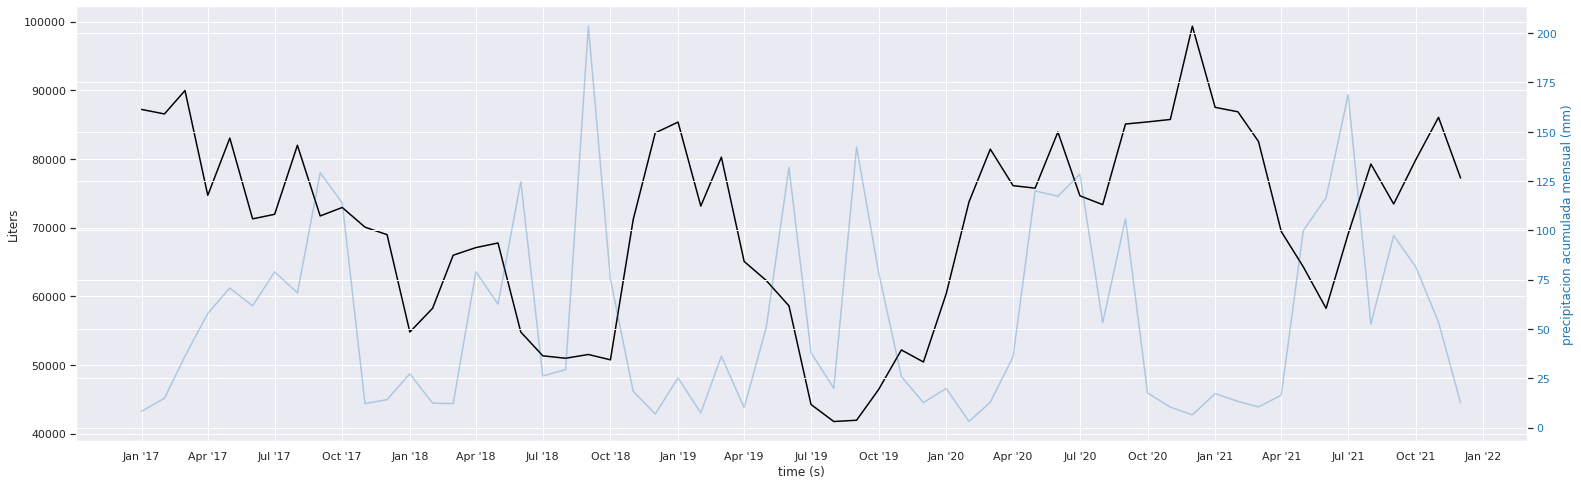

In [52]:
datos_sub = datos[datos['Filial'] == 'CD. VICTORIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALLENDE**

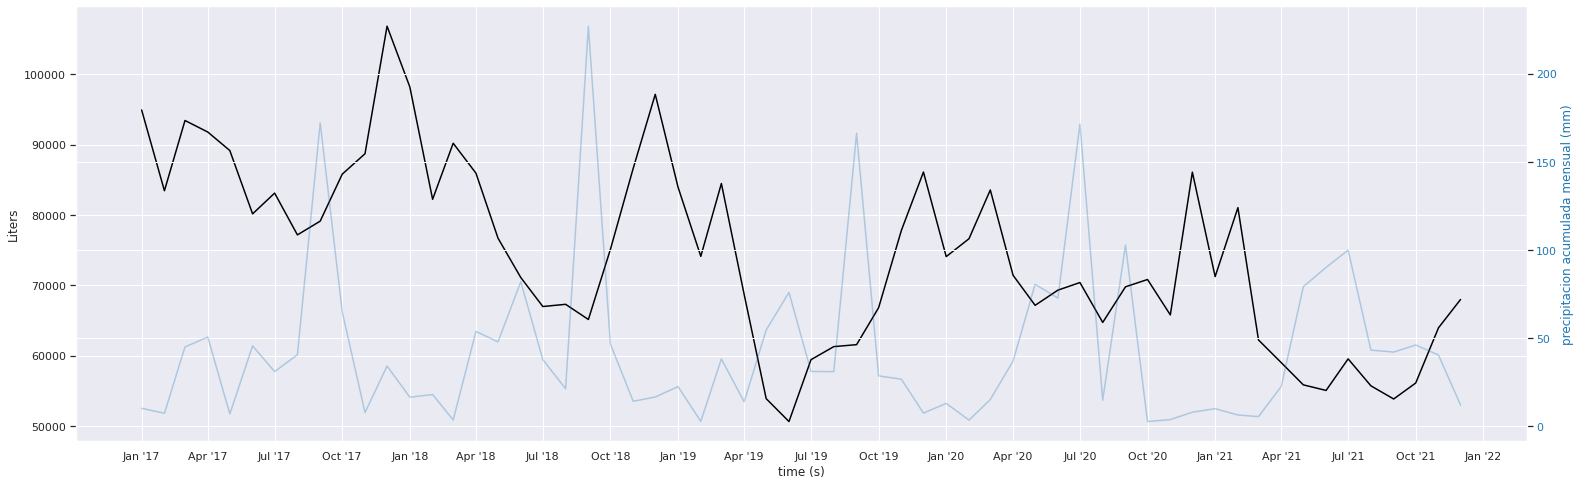

In [53]:
datos_sub = datos[datos['Filial'] == 'ALLENDE']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**HILDA G GARCIA**

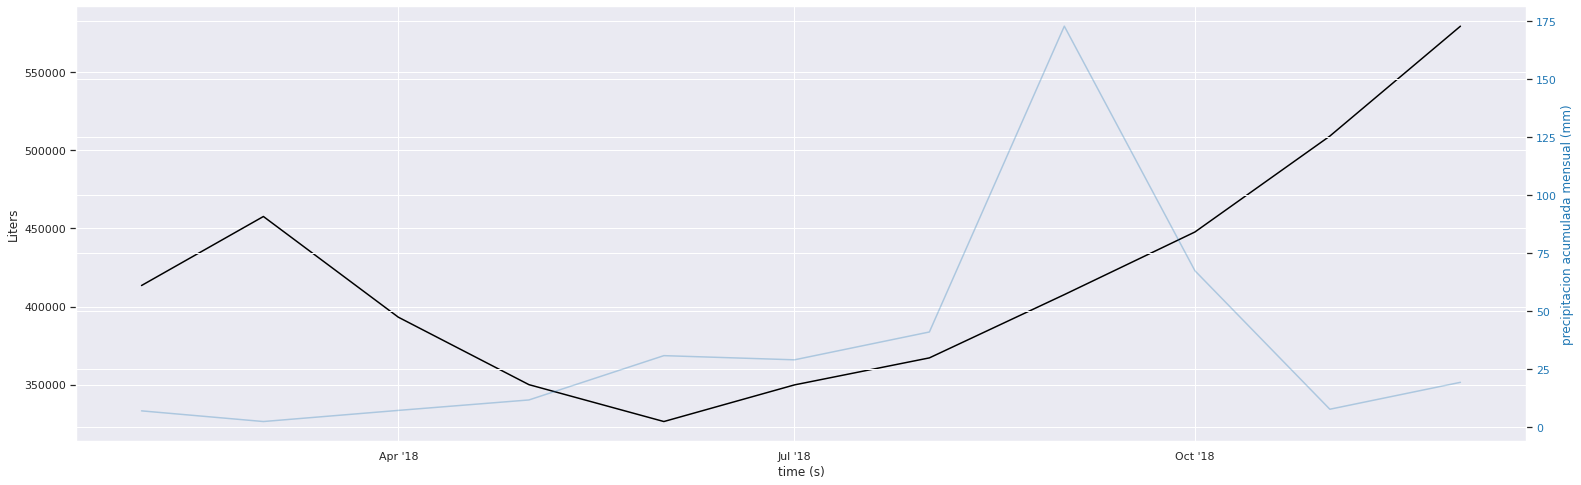

In [54]:
datos_sub = datos[datos['Filial'] == 'HILDA G GARCIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**POZA RICA**

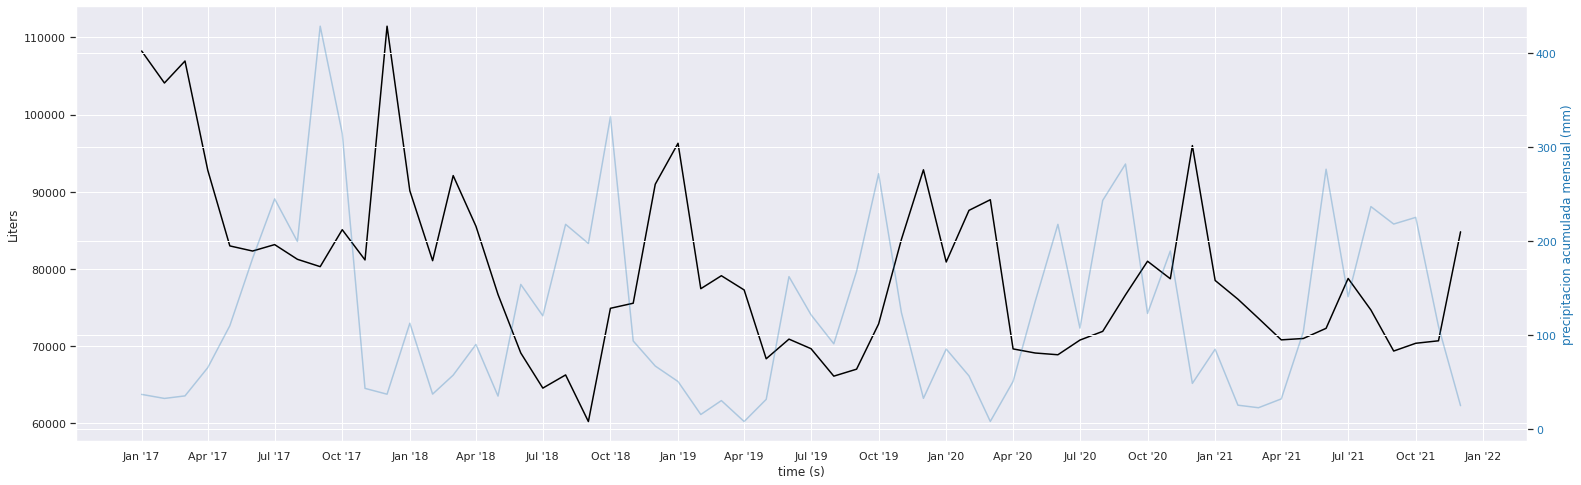

In [55]:
datos_sub = datos[datos['Filial'] == 'POZA RICA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SANTA CATARINA**

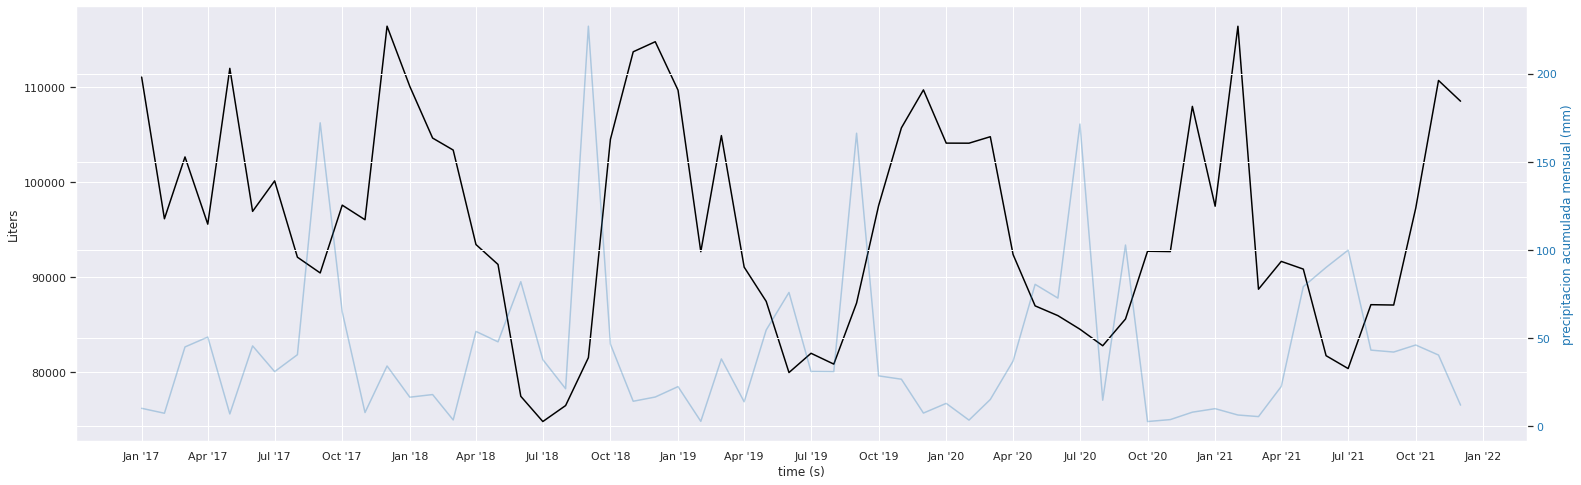

In [56]:
datos_sub = datos[datos['Filial'] == 'SANTA CATARINA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SALINAS VICTORIA**

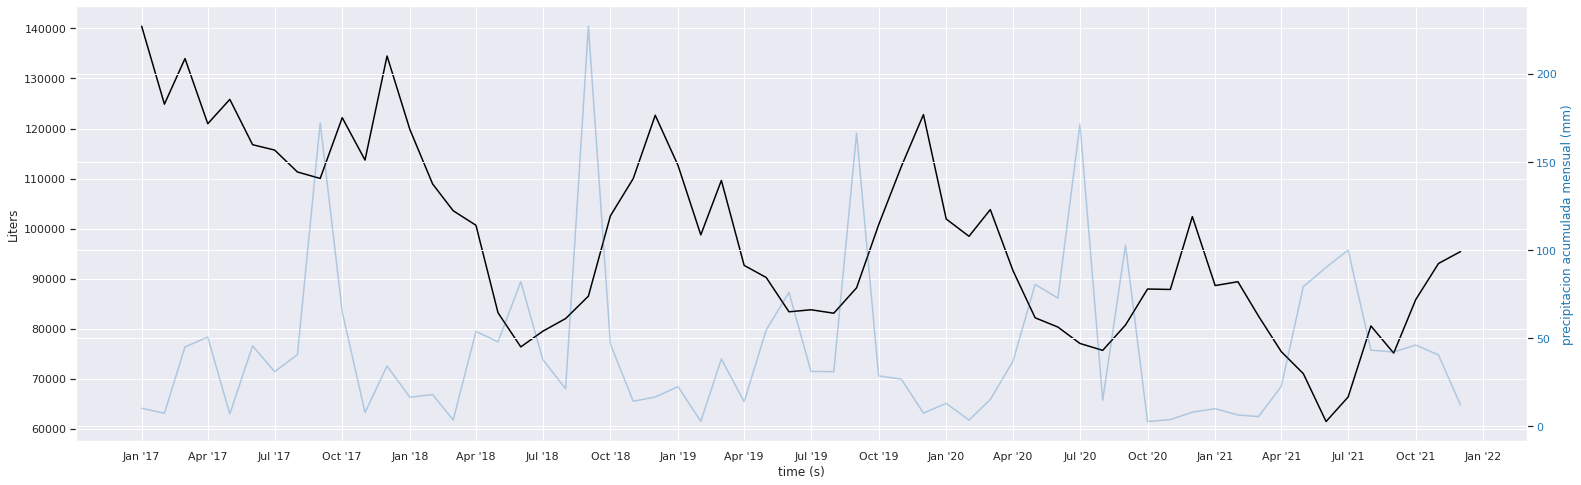

In [57]:
datos_sub = datos[datos['Filial'] == 'SALINASVICTORIA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**ALAMO**

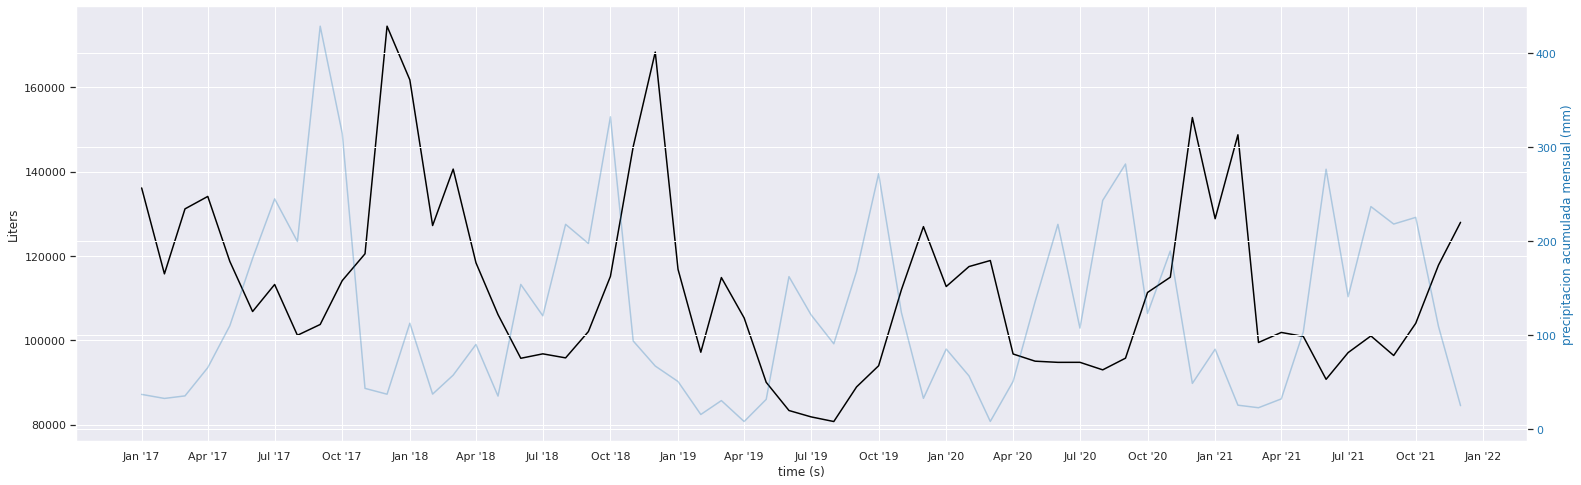

In [58]:
datos_sub = datos[datos['Filial'] == 'ALAMO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**RIO VERDE**

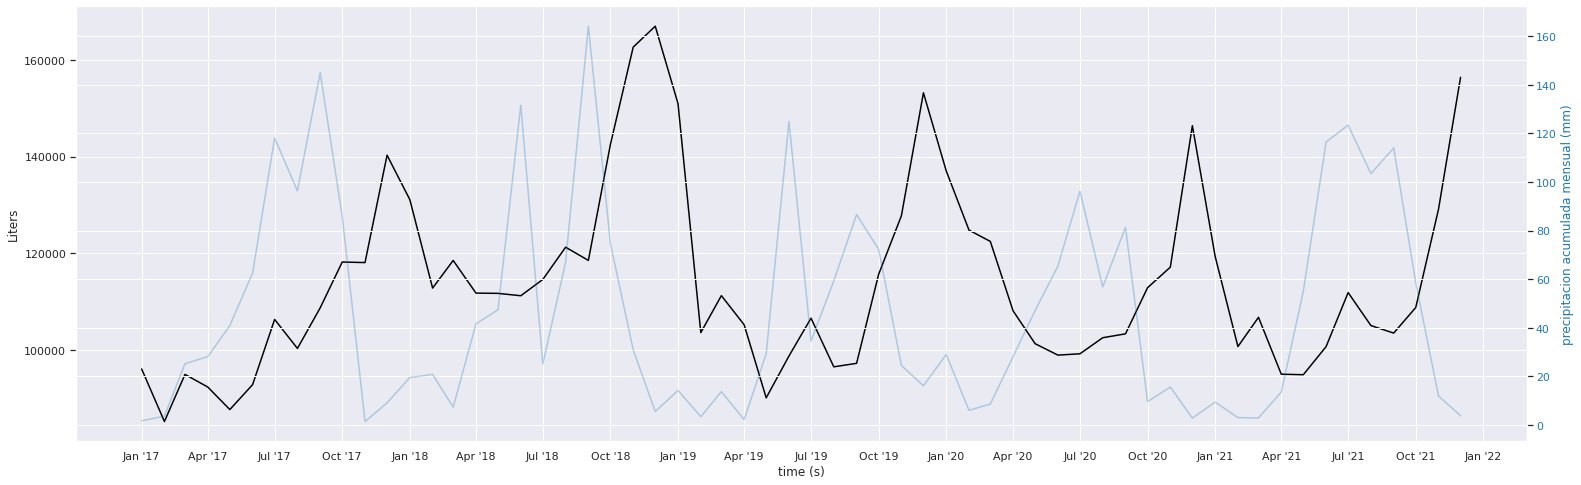

In [59]:
datos_sub = datos[datos['Filial'] == 'RIO VERDE']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**LINARES**

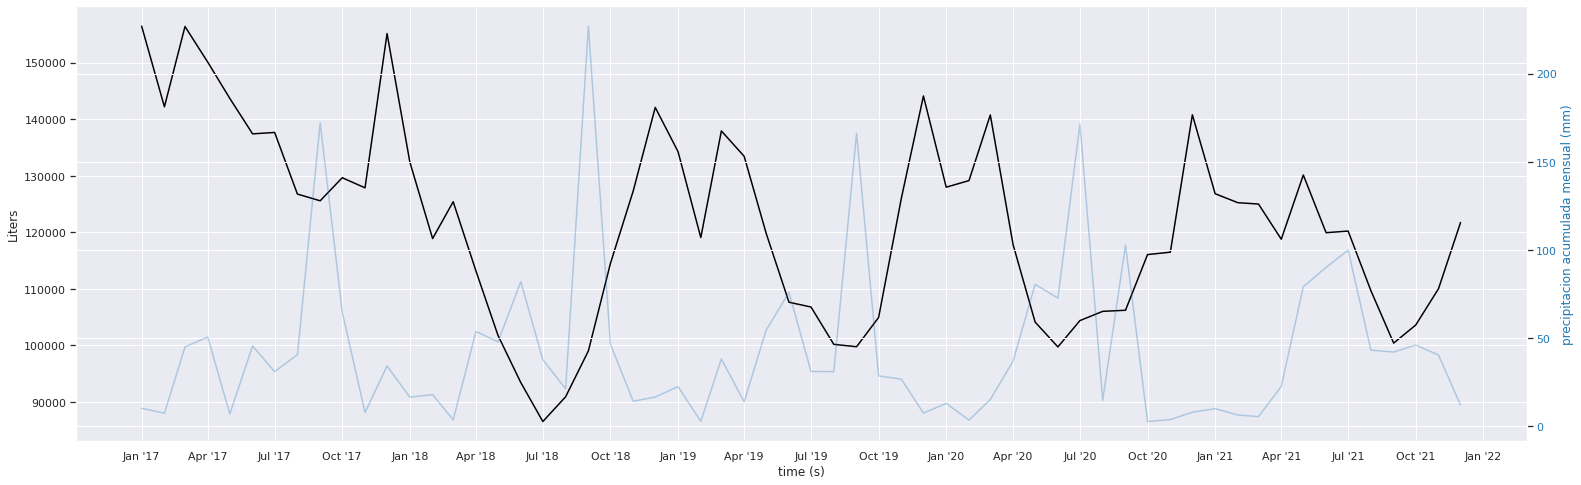

In [60]:
datos_sub = datos[datos['Filial'] == 'LINARES']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**MATEHUALA**

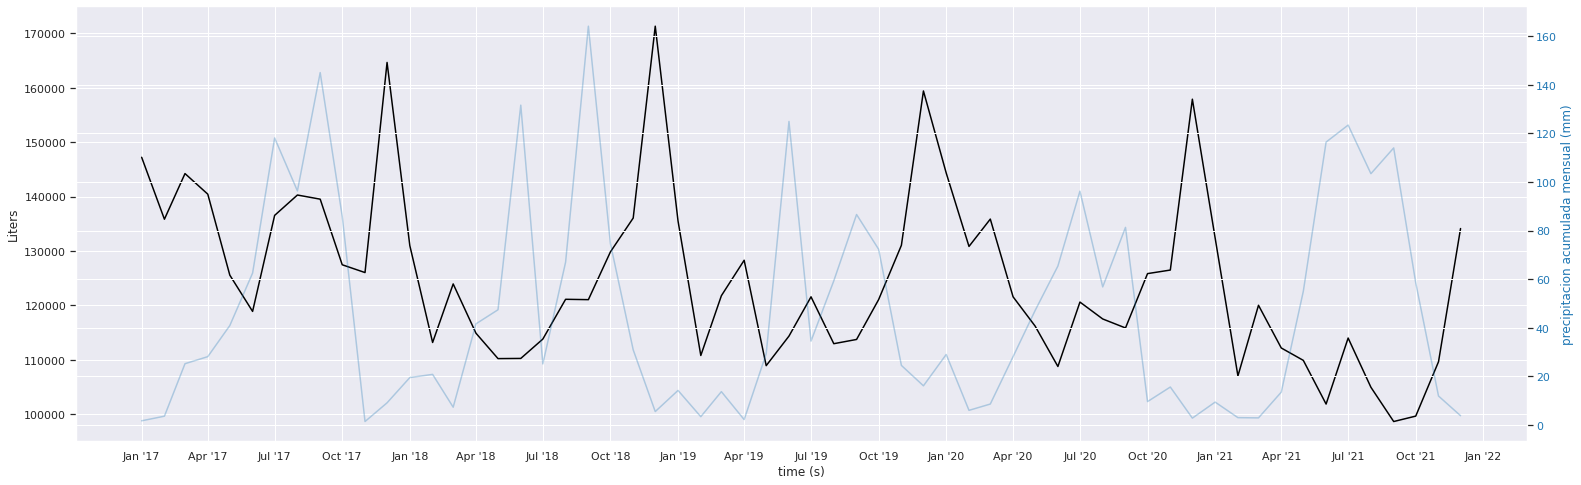

In [61]:
datos_sub = datos[datos['Filial'] == 'MATEHUALA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**TAMPICO**

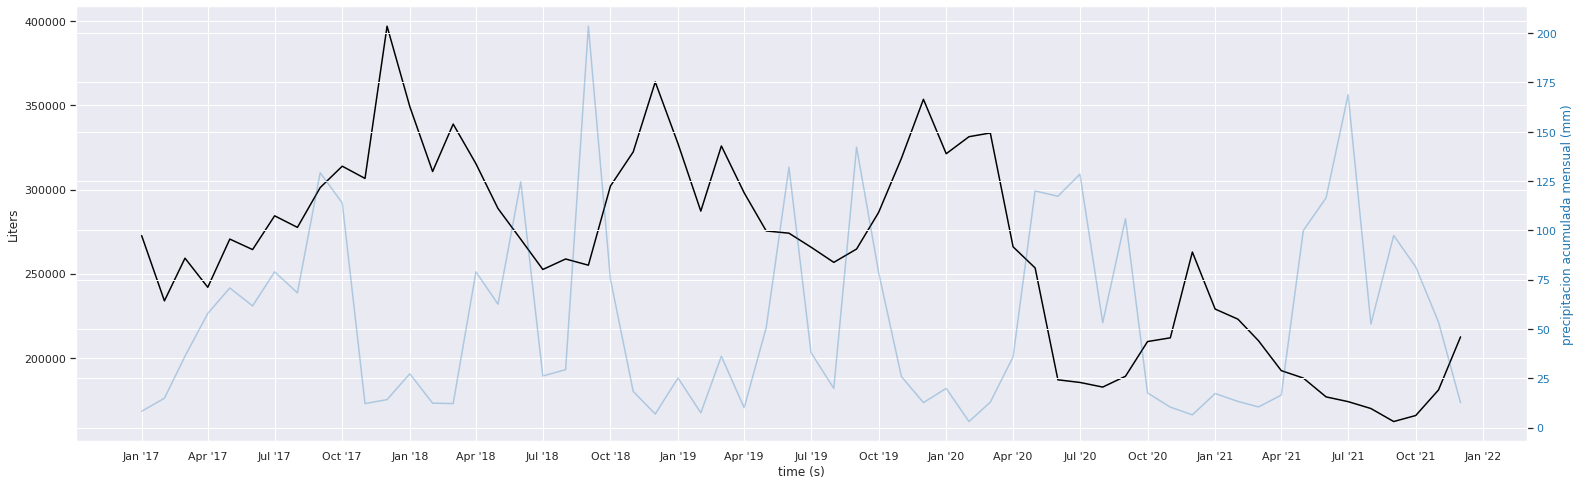

In [62]:
datos_sub = datos[datos['Filial'] == 'TAMPICO']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**REYNOSA**

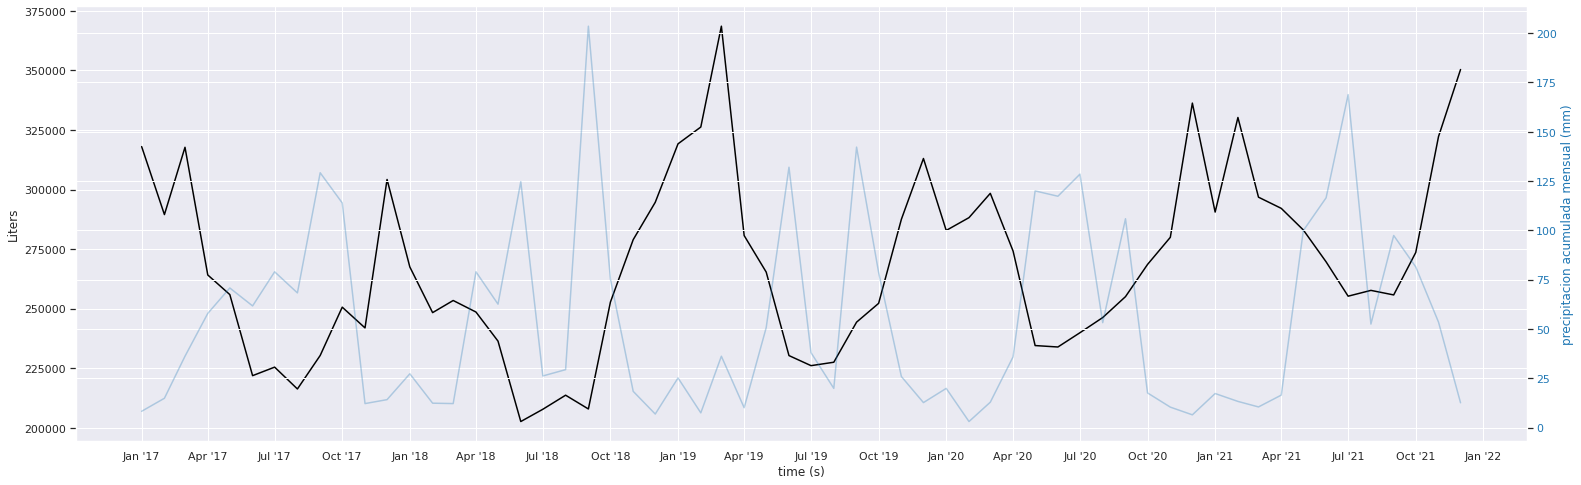

In [63]:
datos_sub = datos[datos['Filial'] == 'REYNOSA']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**SAN NICOLAS**

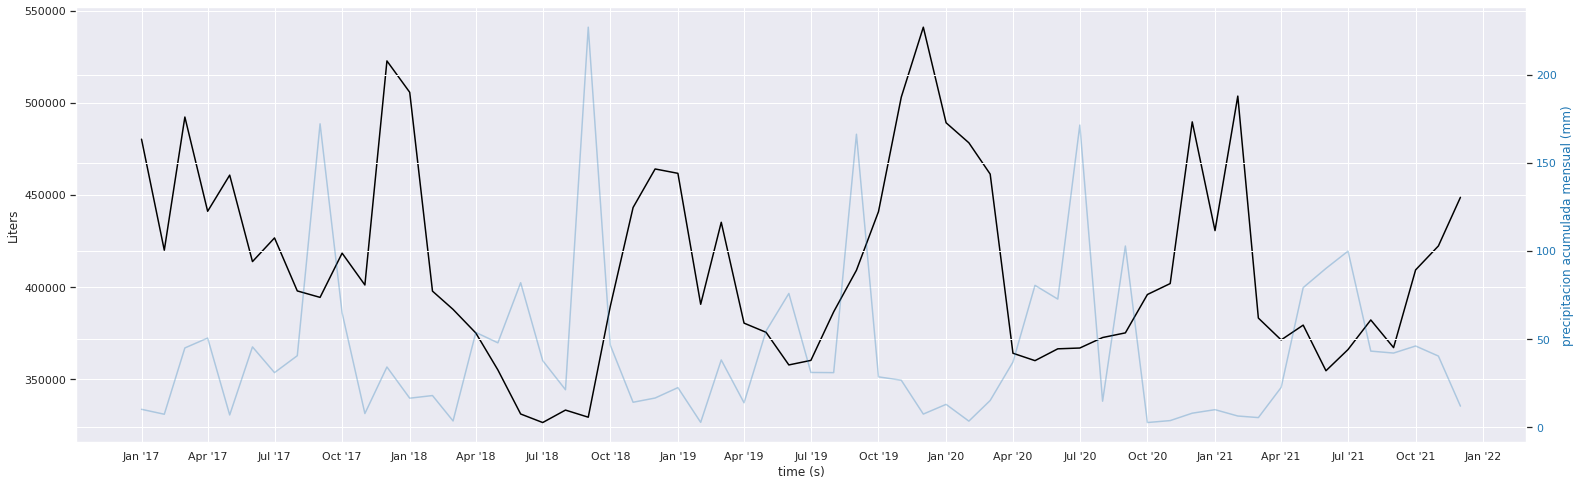

In [64]:
datos_sub = datos[datos['Filial'] == 'SAN NICOLAS']

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

**Filial Monterrey = SANTA CATARINA + SAN NICOLAS**

**Tomamos un subconjunto de datos de Santa Catarina y San Nicolas de la Garza. Sumamos los litros y promediamos la temperatura.**

In [65]:
datos_sub = datos[(datos['Filial'] == 'SANTA CATARINA') | (datos['Filial'] == 'SAN NICOLAS')]

datos_sub_mean = datos_sub.groupby([datos_sub.KeyFecha.dt.to_period('M')]).mean()
datos_sub_sum = datos_sub.groupby([datos_sub.KeyFecha.dt.to_period('M')]).sum()

In [66]:
datos_sub = datos_sub_sum

datos_sub["Temperatura"] = datos_sub_mean["Temperatura"]
datos_sub["Lluvia"] = datos_sub_mean["Lluvia"]

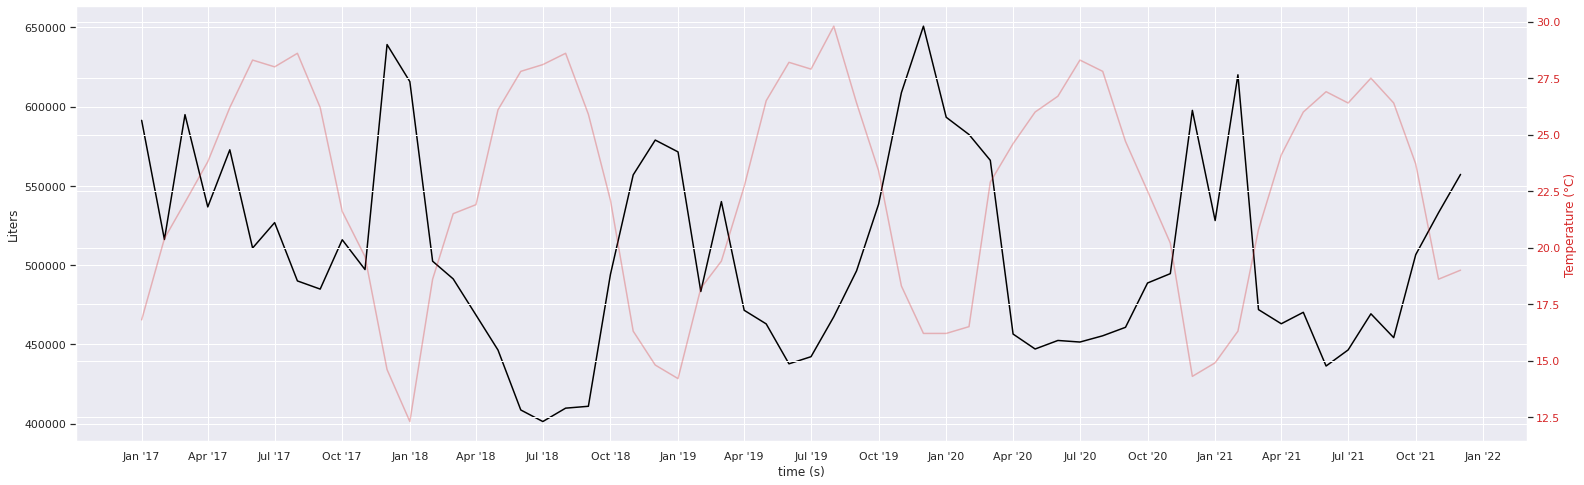

In [67]:
datos_sub = datos_sub.reset_index()
datos_sub['KeyFecha'] = datos_sub['KeyFecha'].map(lambda x: pd.Period.to_timestamp(x))

fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:red'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Temperature (°C)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Temperatura'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

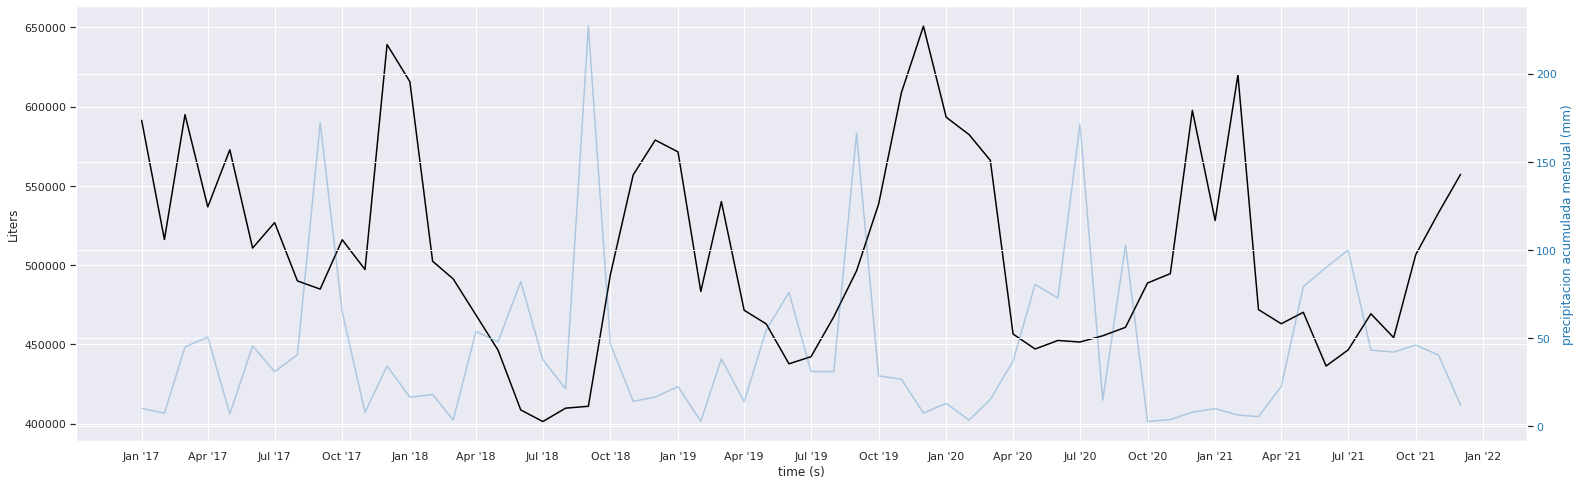

In [68]:
fig, ax1 = plt.subplots()

locator = mdates.MonthLocator(bymonth=(1, 4, 7, 10)) #range(1, 13), interval=3)
formatter = mdates.DateFormatter("%b '%y")

# ax1 = plt.gca()

color = 'black'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Liters')
ax1.plot(datos_sub['KeyFecha'], datos_sub['Litros'], color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_xlabel('time (s)')
ax2.set_ylabel('precipitacion acumulada mensual (mm)', color=color)
ax2.plot(datos_sub['KeyFecha'], datos_sub['Lluvia'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax2.xaxis.set_major_locator(locator) ## calling the locator for the x-axis

In [72]:
!jupyter nbconvert --to html '/content/drive/MyDrive/DATATHON_DSC/Dependencia Litros Temperatura.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/DATATHON_DSC/Dependencia Litros Temperatura.ipynb to html
[NbConvertApp] Writing 7269239 bytes to /content/drive/MyDrive/DATATHON_DSC/Dependencia Litros Temperatura.html


In [70]:
# !ls '/content/drive/MyDrive/DATATHON_DSC/'